In [138]:

# Датасет прогноза риска низкой успеваемости

# Постановка задачи
# UNICEF реализует проект нацеленный на отследживание влияния условий жизни учащихся в возрасте от 15 до 22 лет 
# на их успеваемость по математике, для раннего выявления студентов, находящихся в группе риска.

# Сделать это можно с помощью модели, предсказывающей результаты госэкзамена по математике для каждого ученика школы. 
# Для определения параметров будущей модели, мы проводедём разведывательный анализ данных и по его результатам составим отчёт

# Описание признаков датасета
# Посмотрим на переменные, которые содержит датасет:

# 1 school — аббревиатура школы, в которой учится ученик

# 2 sex — пол ('F' - женский, 'M' - мужской)

# 3 age — возраст (от 15 до 22)

# 4 address — тип адреса ('U' - городской, 'R' - за городом)

# 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

# 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

# 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

# 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

# 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

# 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

# 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

# 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

# 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

# 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

# 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

# 16 schoolsup — дополнительная образовательная поддержка (yes или no)

# 17 famsup — семейная образовательная поддержка (yes или no)

# 18 paid — дополнительные платные занятия по математике (yes или no)

# 19 activities — дополнительные внеучебные занятия (yes или no)

# 20 nursery — посещал детский сад (yes или no)

# 21 higher — хочет получить высшее образование (yes или no)

# 22 internet — наличие интернета дома (yes или no)

# 23 romantic — в романтических отношениях (yes или no)

# 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

# 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

# 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

# 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

# 28 absences — количество пропущенных занятий

# 29 score — баллы по госэкзамену по математике (целевой признак)

# Предлагаемый план действий
# 1) Провести первичную обработку данных. Так как данных много, рекомендовано написать функции, для обработки столбцов различных типов.

# 2) Рассмотреть распределение признака для числовых переменных и устраните выбросы.

# 3) Оценить количество уникальных значений для номинативных переменных.

# 4) По необходимости преобразовать данные

# 5) Провести корреляционный анализ количественных переменных, отобрать не коррелирующие переменные.

# 6) Проанализировать номинативные переменные и устранить те из них, которые не влияют на предсказываемую величину переменной score.

# 7) Сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

# Для работы с переменными, создадим пользовательский класс Myfirstclass

In [1]:
"""Класс для работы с данными"""


class Myfirstclass:
    """Селектор метода обработки нулевых значений"""

    def deleter(self, dfprocessed, selector):
        # Принимает датафрейм и код селектора. Код 0 удаляет , остальные заменяют
        # пропущенные значения на меры центральной тендненции.
        dfprocessed = copy.deepcopy(dfprocessed)
        if selector == 0:  # Радикальное удаление строк содержащие хотя бы одно нулевое значение
            dfprocessed.dropna(how='any', inplace=True)
            return dfprocessed
        elif selector == 1:  # Замена пропусков модальными значениями
            for i in dfprocessed.columns:
                dfprocessed[i].fillna(dfprocessed[i].mode()[0], inplace=True)
            return dfprocessed
        elif selector == 2:  # Замена пропусков медианными значениями
            for i in dfprocessed.columns:
                dfprocessed[i].fillna(dfprocessed[i].median(), inplace=True)
            return dfprocessed
        elif selector == 3:  # Замена пропусков средними значениями
            for i in dfprocessed.columns:
                dfprocessed[i].fillna(dfprocessed[i].mean(), inplace=True)
            return dfprocessed
    """Сплиттер бинарных/небинарных величин. Создаёт соответствующие датафреймы"""

    # Делит передаваемые датафрейм на фрейм бинарных и небинарных значений.
    def bin_nonbin_splitter(self, dfsplit):
        dfb = pd.DataFrame()
        dfnb = pd.DataFrame()
        dfsplit = copy.deepcopy(dfsplit)
        for i in dfsplit.columns[:-1]:
            if dfsplit[i].nunique() == 2:
                dfb[i] = dfsplit[i]
            else:
                dfnb[i] = dfsplit[i]
        dfb['score'] = dfsplit.score
        dfnb['score'] = dfsplit.score
        return dfb, dfnb
    """Оценщик значимости бинарных параметров."""

    # Метод реализует оценку значимости бинарных критериев
    def binaries_significance_checker(self, bindf, Pval):
                                                           # с применением критерия Стьюдента
        features_list = []
        bindf = copy.deepcopy(bindf)
        for feature in bindf.columns[:-1]:
            uniques = bindf[feature].unique()
            score_list = []
            for availables in uniques:
                scores = bindf.score[bindf[feature] == availables]
                score_list.append(scores.values)
            print("-------", feature, "--------------------------")
            t, p = stats.ttest_ind(score_list[0], score_list[1])
            print("T=", t, "P=", p)
            if p > Pval:
                print("Feature is not significant!", sep="\n",  end='\n')
            else:
                print("Feature is significant!", sep="\n",  end='\n')
                features_list.append(feature)
            print("--------------------------------------------", end='\n\n')
        bin_significants = []
        """Значимые параметры"""    # Формируем список значимых параметров
        for feature in features_list:
            #             grouper=bindf.groupby(dfb[feature]).score.agg(["max", "min", "mean", 'median'])
            grouper = bindf.groupby(bindf[feature]).score.agg(
                ["max", "min", "mean", 'median'])
            display(grouper)
        print(features_list)

    """Построитель распределений признаков по значениям """

    # Принимает датасет и вывода/пропуска частот встречаемости значения
    def feat_dist(self, dataset, freqs):
        dataset = copy.deepcopy(dataset)
        for idx, i in enumerate(dataset.columns[:-1]):
            l = {}
            z = dataset[i].value_counts(dropna=True)
            l.update(z)
            nun = dataset[i].nunique()
            valsum = sum(l.values())
            if freqs == True:
                print(f'# ({idx+1:<2}) {i:<12} Qty.: {valsum:>1}.   --->   {l}.')
            elif freqs == False:
                print(
                    f'# ({idx+1:<2}) {i:<12} Qty.: {valsum:>1}.   --->   {list(l.keys())}.')
            else:
                print("Please choose Yes to print occurences number and No to skip it")
    """Построитель распределений признаков по значениям и результатам экзамена по значениям"""

    # Вывод для параметра частот встречаемости значений и зависимости от этих значений целевого признака score
    def distrandscore(self, datashow):
        datashow = copy.deepcopy(datashow)
        for idx, i in enumerate(datashow.columns[:-1]):
            l = {}
            z = datashow[i].value_counts()
            l.update(z)
            nun = datashow[i].nunique()
            sum_of_values = sum(l.values())
            f = plt.figure(1)
            g = plt.figure(2)
            print(
                '__________________________________________________________________________________________')
            fig = plt.figure(figsize=(16, 4))
            plt.rcParams['axes.labelsize'] = 16
            plt.rcParams['axes.titlesize'] = 16
            plt.rcParams["xtick.labelsize"] = 10
            plt.rcParams["ytick.labelsize"] = 10
            for value in l.items():
                splitlist = []
                qtylist = []
                vallist = []
                splitsmodelist = []
                print()
                splits = round(datashow.groupby(
                    i).get_group(value[0]).score.median(), 2)
                splitsmode = round(datashow.groupby(i).get_group(
                    value[0]).score.mode().mean(), 2)
                splitlist.append(splits)
                vallist.append(value[0])
                qtylist.append(value[1])
                splitsmodelist.append(splitsmode)
                vallist1 = vallist
                print(
                    f' {"Feature" :<13}  {"Value" :<11} {"Obs." :>8} {"% Obs" :>10}  {"Median":>10} {"Mode" :>10} ')
                print(
                    f' {i :<15}  {value[0] :<9} {value[1] :>7} {round(((value[1]/sum_of_values))*100, 0) :>11}  {round(splits, 1):>10} {splitsmode :>10} ')
                plt.title(i)
                plt.subplot(1, 3, 1)
                plt.title('Distribution')
                plt.bar(vallist1, qtylist)
                plt.xlabel(i)
                plt.ylabel('Students')
                plt.subplot(1, 3, 3)
                plt.title('Modes')
                plt.scatter(vallist1, splitsmodelist)
                plt.xlabel(i)
                plt.ylabel('Students')
                plt.subplot(1, 3, 2)
                plt.title('Median')
                plt.scatter(vallist, splitlist)
                plt.ylabel('Scores')
                plt.xlabel(i)
            plt.subplots_adjust(wspace=0.4, hspace=0.4)
            plt.show()
            print(l)
        print('_____________________________________________________________________', end="\n\n")
    '''Оценщик значимости мультинарных признаков'''

    # Принимает подсет мультинарных параметров и ищет статистически  значимые различия в их значениях.
    def multi_T_test(self, datafile):
        # Поиск осуществляется попарным сличением с использованием критерия Стьюдента с поправкой Бонферрони. Решение подсмотрено у
        #  @alex-sokolov2011 (module_2/Project 2 exploratory data analysis.ipynb)
        datafile = copy.deepcopy(datafile)
        print(f' Feature      Combin.   Pvalue')
        for column in datafile.columns.drop('score'):
            cols = datafile[column].value_counts().index
            combinations_all = list(combinations(cols, 2))
            for comb in combinations_all:
                column0 = datafile[datafile[column] == comb[0]].score
                column1 = datafile[datafile[column] == comb[1]].score
                ttest = ttest_ind(column0, column1)
                # Вводим поправку Бонферони.
#                 if ttest.pvalue <= 0.05:
                if ttest.pvalue <= 0.05/len(combinations_all):
                    print("...............................")
                    print(
                        f'{column :<13}  {int(comb[0]):<1} & {int(comb[1]):>1}    {ttest.pvalue.round(4) :<5} ')

In [2]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from itertools import combinations
from scipy.stats import ttest_ind
import copy

# Инициальзируем класс Myfirstclass

In [80]:
df = pd.read_csv('stud_math.csv')
print(list(df.columns))
df.dtypes.value_counts()

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


object     17
float64    12
int64       1
dtype: int64

In [77]:
# Таким образом, в представленном датасете имеются 17 категориальных признаков, 
# 12 признаков с типом float, а также целочисленная переменная "age".


In [81]:
# Определим корреляцию представленных данных
df.corr().round(2)

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.00,-0.16,-0.14,0.08,-0.02,0.23,0.02,0.07,0.03,0.14,-0.07,0.09,-0.16
Medu,-0.16,1.00,0.28,-0.17,0.08,-0.25,-0.08,-0.01,0.03,0.06,-0.05,-0.01,0.21
Fedu,-0.14,0.28,1.00,0.03,0.06,-0.15,-0.06,0.04,-0.07,-0.02,0.03,0.00,0.08
traveltime,0.08,-0.17,0.03,1.00,-0.10,0.06,0.10,-0.02,-0.02,0.04,-0.02,-0.05,-0.07
studytime,-0.02,0.08,0.06,-0.10,1.00,-0.18,-1.00,0.05,-0.12,-0.05,-0.08,-0.03,0.12
failures,0.23,-0.25,-0.15,0.06,-0.18,1.00,0.18,-0.02,0.10,0.12,0.08,0.06,-0.34
"studytime, granular",0.02,-0.08,-0.06,0.10,-1.00,0.18,1.00,-0.05,0.12,0.05,0.08,0.03,-0.12
famrel,0.07,-0.01,0.04,-0.02,0.05,-0.02,-0.05,1.00,0.18,0.08,0.08,-0.08,0.06
freetime,0.03,0.03,-0.07,-0.02,-0.12,0.10,0.12,0.18,1.00,0.30,0.06,0.01,0.02
goout,0.14,0.06,-0.02,0.04,-0.05,0.12,0.05,0.08,0.30,1.00,-0.02,-0.05,-0.13


In [12]:
# Определена 100 % отрицательная зависимость между переменными "studytime" и "studytime, granular".
# Удалим последний из этих признаков.

In [82]:
del df['studytime, granular']

In [14]:
# Исследование мер центральной тенденции, нахождение выбросов
# Медианные и средние значения параметров
# Попробуем рассмотреть меры центральной тенденции для датасета. 
# Для начала, изучим порядковые переменные и посмотрим как могут выглядеть наши "средний" и "медианный" студенты, 
# а также какие минимальные и максимальные значения принимают признаки. 
# Далее мы рассмотрим модальные значение для категориальных и порядковых признаков.

In [15]:
a = df.describe(exclude='object', percentiles=[0.5]).T

In [16]:
a[['mean', '50%', "min", "max"]].T.round(
    1).rename({'50%': 'median'}, axis='index')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
mean,16.7,2.8,2.6,1.4,2.0,0.3,3.9,3.2,3.1,3.5,7.3,52.3
median,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0
min,15.0,0.0,0.0,1.0,1.0,0.0,-1.0,1.0,1.0,1.0,0.0,0.0
max,22.0,4.0,40.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,385.0,100.0


In [17]:
# Итак среднему и медианному студентам около 17 лет. 
# До школы эти студенты добираются не более получаса, на учёбу вне школы тратят не более 5 часов в неделю. 
# У них нет внеурочных неудач, хорошие семейные отношения, среднее количество свободного времени и времени которе они тратят на общение с друзьями. 
# Здоровье в целом хорошее. Пропускают мало и на экзамене набирают 52-55 баллов.

# Взглянем на описательную статистику по датасету и изучим его на предмет выявления аномальных значений.

# Мы отмечаем странные значения для некоторых признаков:

# 1) Максимальный уровень образования для отцов в датафрейме равен 40, мы же знаем что больше четырёх он не может быть. 
# Практически со стопроцентной уверенностью можно предположить что при регистрации не там была поставлена запятая.

# 2) Для признака famrel мы видим отрицательное значение -1, при том что признак согласно заданию имеет значения больше 0. 
# Меняем знак и относим наблюдение к классу 1 по семейным отношениям.


In [83]:
# Исправляем значения

df.Fedu[df.Fedu == 40.0] = 4.0
df.famrel[df.famrel == -1.0] = 1.0

<ipython-input-83-69cf3642e2f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Fedu[df.Fedu == 40.0] = 4.0
<ipython-input-83-69cf3642e2f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.famrel[df.famrel == -1.0] = 1.0


In [19]:
# Итак перед нами распределение похожее на гамма-распределение. Максимальное значение вначале, 
# далее резкое снижение с очень медленным затуханием. Несмотря на высокие значения для некоторых наблюдений, 
# эти значения формально не являются ошибочными, поскольку верхняя граница условиями задачи не определена. 
# Однако, в США и западных странах школьный год составляет 170-200 дней. 
# Два наблюдения в нашем сете содержат более высокие значения. 
# Возможно их необходимо интерпретировать как академический отпуск, либо нахождение на домашнем обучении не менее одного учебного года. Посмотрим насколько успешно сдали экзамен эти два студента и есть ли между ними что-то общее.

# Итак сходства между признаками этих студентов немного: живут в городе недалеко от школы, 
# матери имеют девятиклассное образование и заняты на госслужбе. 
# Студенты не имеют романтических отношений , на учёбу вне школы тратят не более 5 часов. Оба ходили в детский сад.

In [20]:
b = df[df.absences > 200].T
b[b[222] == b[390]].T

,address,Medu,Mjob,traveltime,studytime,activities,nursery,higher,romantic
222,U,2,services,1,2,no,yes,yes,no
390,U,2,services,1,2,no,yes,yes,no


In [21]:
b[b[222] != b[390]].T

,school,sex,age,famsize,Pstatus,Fedu,Fjob,reason,guardian,failures,schoolsup,famsup,paid,internet,famrel,freetime,goout,health,absences,score
222,GP,F,16,GT3,T,3,teacher,other,mother,0,yes,NaN,no,yes,2,3,1,3,385,85
390,MS,M,20,LE3,A,2,services,course,NaN,2,no,yes,yes,no,5,5,4,4,212,45


In [22]:
# Итак у нас 2 сильно отличающихся по значениям признаков профиля:

# 1) 16-летняя девушка из полной семьи из более трёх человек, учащаяся в школе GP имеющая отца со средним образованием и занятым в сфере образования, не имевшая ни одной внешкольной неудачи. Она пользуется образовательной поддержкой но не посещает платные занятия по математике. У нее среднее количество свободного времени, но она очень мало времени проводит с друзьями, уровень здоровья средний. Причина поступления в GP неизвестна. Отношения в семье плохие.

# Похоже эта девушка находится на домашнем обучении (скорее всего по каким-то семейнм обстоятельствам а не по болезни), а экзамены сдаёт экстерном. Возможно именно возможность учиться дома и обусловила её поступление в школу GP.

# 2) 20-летний юноша учится в другой школе (MS), в его неполной семье не более 3 человек и отношения очень хорошие, информация о законном представителе отсутствует. Его отец менее образован чем отец девушки и имеет такой же уровень образования как и мать юноши, как и она занят на госслужбе. У юноши уже 2 внеучебные неудачи, у него много свободного времени и он часто проводит его с друзьями, отличается хорошим здоровьем.

# Кажется этот студент ведёт настолько насыщенную внешкольную жизнь, что на школу у него просто нет времени, результат -соответствующий.

# Как мы видим ничего существенно общего между этими наблюдениями нет, поэтому высокие значения пропущенных занятий нам ни о чём не говорят. Эти различия говорят не о большом разбросе значений результатов экзаменов соответствующих пропускам завнятий, а о их зависимости от иных параметров. Мы не сильно ухудшим модель если вообще удалим их из сета. Однако, эти наблюдения могут вносить свой вклад по другим признакам, и необходимости в избавлении от них у нас нет.

In [84]:
# Модальные значения
# Посмотрим теперь что у нас с модальными значениями для студентов. 
# Эта информация может быть нам полезна для изучения категориальных переменных.
print('Our "Modal" student:')
modals = df.mode()
print(modals.T)


Our "Modal" student:
                 0
school          GP
sex              F
age             16
address          U
famsize        GT3
Pstatus          T
Medu             4
Fedu             2
Mjob         other
Fjob         other
reason      course
guardian    mother
traveltime       1
studytime        2
failures         0
schoolsup       no
famsup         yes
paid            no
activities     yes
nursery        yes
higher         yes
internet       yes
romantic        no
famrel           4
freetime         3
goout            3
health           5
absences         0
score           50


In [85]:
# Посмотрим какой процент составляет самое часто встречающееся знрчение для каждого параметра
a = df.describe(include='object').T
a['% predom'] = (a['freq']/a['count'])*100
a['% predom'] = a['% predom'].map(lambda x: round(x, 0))
a.sort_values('% predom', ascending=False)

,count,unique,top,freq,% predom
higher,375,2,yes,356,95.0
Pstatus,350,2,T,314,90.0
school,395,2,GP,349,88.0
schoolsup,386,2,no,335,87.0
internet,361,2,yes,305,84.0
nursery,379,2,yes,300,79.0
address,378,2,U,295,78.0
famsize,368,2,GT3,261,71.0
guardian,364,3,mother,250,69.0
romantic,364,2,no,240,66.0


In [25]:
# Итак, "модальный" студент(-ка), происходит из полной семьи состоящей из более чем трёх человек,
# живёт в городе и учится в школе GP куда поступил ориентируясь на программу обучения, имеют модальный возраст.
# Мать с высшим образованием, отец- с девятиклассным. Опекун- мать. До школы студент добирается не более чем за 15 минут.
# Семейные отношения хорошие, имеет среднее количество свободного времени и среднее время на общение с друзьями.
# Не пользуется школьшой поддержкой и не посещает платные занятия по математике, но имеет домашнюю поддержку и посещает внеурочные занятия.
# Отличается отличным здоровьем. Хочет получить высшеее образование, не состоит в романтических отношениях.
# Результат- 50 баллов.

# Из близости и равенства оценок для многих показателей (к примеру studytime, failures и пр.)
# мы можем сделать предположение о нормальности распределений этих признков по значениям.

In [86]:
# Характер распределения признаков
# Теперь посмотрим, какие значения и с какой частотой принимают наши независимые признаки. 
# Для этого инициализируем пользовательский класс Myfirstclass и используем метод feat_dist, 
# показывающий распределение параметра по принимаемым значениям. 
# Для вывода количественного распределения, выбираем аргумент Freqs=True


processor = Myfirstclass()

In [87]:
processor.feat_dist(df, freqs=True)

# (1 ) school       Qty.: 395.   --->   {'GP': 349, 'MS': 46}.
# (2 ) sex          Qty.: 395.   --->   {'F': 208, 'M': 187}.
# (3 ) age          Qty.: 395.   --->   {16: 104, 17: 98, 18: 82, 15: 82, 19: 24, 20: 3, 22: 1, 21: 1}.
# (4 ) address      Qty.: 378.   --->   {'U': 295, 'R': 83}.
# (5 ) famsize      Qty.: 368.   --->   {'GT3': 261, 'LE3': 107}.
# (6 ) Pstatus      Qty.: 350.   --->   {'T': 314, 'A': 36}.
# (7 ) Medu         Qty.: 392.   --->   {4.0: 131, 2.0: 102, 3.0: 97, 1.0: 59, 0.0: 3}.
# (8 ) Fedu         Qty.: 371.   --->   {2.0: 106, 3.0: 96, 4.0: 89, 1.0: 78, 0.0: 2}.
# (9 ) Mjob         Qty.: 376.   --->   {'other': 133, 'services': 98, 'at_home': 58, 'teacher': 55, 'health': 32}.
# (10) Fjob         Qty.: 359.   --->   {'other': 197, 'services': 102, 'teacher': 29, 'at_home': 16, 'health': 15}.
# (11) reason       Qty.: 378.   --->   {'course': 137, 'home': 104, 'reputation': 103, 'other': 34}.
# (12) guardian     Qty.: 364.   --->   {'mother': 250, 'father': 86, 'ot

In [88]:
# Как мы видим выше, большинство из признаков имеют пропуски. 
# Определим количество и процент пропущенных значений для каждого признака, а также для всего сета.

nulls = df.isnull() == True
absence = pd.DataFrame(nulls.sum(), columns=["Missing"])
absence['%'] = nulls.mean().round(2)*100
fullmissingspct = nulls.sum().sum()/df.size*100
display(absence.sort_values("%"))
print("Overall missings %:", fullmissingspct.round(2))

,Missing,%
school,0,0.0
sex,0,0.0
age,0,0.0
Medu,3,1.0
goout,8,2.0
schoolsup,9,2.0
studytime,7,2.0
score,6,2.0
freetime,11,3.0
absences,12,3.0


Overall missings %: 4.87


In [29]:
# Cамые полные данные мы имеем для 3-х независимых признаков: 'school', 'sex', 'age'. 
# Отметим, что среди записей с отсутствующими значениями, у нас имеется 6 записей для которых отсутствуют значения 
# целевого признака. 
# Признаки для этих студентов мы изучим отдельно, исключив эти наблюдения из основного датасета. 
# Как мы видим большая часть признаков имеет не более 5% пропущенных значений. 
# В целом данные хорошие и могут быть использованы для построения модели.

In [89]:
# Сет с пропущенными значениями целевого признака score
# Несмотря на то, что объём подвыборки сформированной из этих наблюдений невелик и значимость получаемых выводов сомнительна, 
# посмотрим как распределенены зачения независимых признаков,а также насколько характерны эти значения для других частей датасета.

dfna = df[df.score.isnull() == True]

dfna.shape

(6, 29)

In [31]:
# Проанализируем какие значения и с какой частотой принимают переменные.

processor.feat_dist(dfna, freqs=True)

# (1 ) school       Qty.: 6.   --->   {'GP': 5, 'MS': 1}.
# (2 ) sex          Qty.: 6.   --->   {'F': 4, 'M': 2}.
# (3 ) age          Qty.: 6.   --->   {19: 3, 18: 2, 16: 1}.
# (4 ) address      Qty.: 4.   --->   {'U': 4}.
# (5 ) famsize      Qty.: 6.   --->   {'GT3': 6}.
# (6 ) Pstatus      Qty.: 6.   --->   {'T': 6}.
# (7 ) Medu         Qty.: 6.   --->   {1.0: 3, 2.0: 2, 3.0: 1}.
# (8 ) Fedu         Qty.: 6.   --->   {1.0: 3, 3.0: 2, 2.0: 1}.
# (9 ) Mjob         Qty.: 6.   --->   {'other': 6}.
# (10) Fjob         Qty.: 6.   --->   {'services': 3, 'other': 3}.
# (11) reason       Qty.: 6.   --->   {'home': 3, 'course': 2, 'reputation': 1}.
# (12) guardian     Qty.: 6.   --->   {'other': 4, 'mother': 2}.
# (13) traveltime   Qty.: 6.   --->   {1.0: 3, 2.0: 2, 3.0: 1}.
# (14) studytime    Qty.: 6.   --->   {2.0: 5, 3.0: 1}.
# (15) failures     Qty.: 6.   --->   {0.0: 3, 3.0: 1, 1.0: 1, 2.0: 1}.
# (16) schoolsup    Qty.: 6.   --->   {'no': 4, 'yes': 2}.
# (17) famsup       Qty.: 5.   --->

In [90]:
a = dfna.describe(include='object').T
a['% predom'] = (a['freq']/a['count'])*100
a['% predom'] = a['% predom'].map(lambda x: round(x, 0))
a.sort_values('% predom', ascending=False)

,count,unique,top,freq,% predom
higher,6,1,yes,6,100.0
address,4,1,U,4,100.0
famsize,6,1,GT3,6,100.0
Pstatus,6,1,T,6,100.0
Mjob,6,1,other,6,100.0
school,6,2,GP,5,83.0
internet,6,2,yes,5,83.0
romantic,6,2,no,5,83.0
sex,6,2,F,4,67.0
schoolsup,6,2,no,4,67.0


In [33]:
# Общие выводы по выборке: Рассмотрев значения, которые принимают эти признаки, мы можем прийти к определённым выводам:

# Все студенты этой группы из полных семей размером более 3 человек, живут в городе.

# Уровень образования родителей студентов не выше среднего и среднеспециального, 
# возможно им тяжело правильно замотивировать своих детей и помочь им с подготовкой к экзаменам.

# Нам ничего неизвестно о сфере занятости матерей и части отцов студентов (тех что не заняты на госслужбе), 
# но по всей видимости низкий уровень образования не позволяет им претендовать на высококвалифицированную 
# и хорошо оплачиваемую работу.

# Можно было бы предположить что этим студентам приходится подрабатывать чтобы помочь своей семье в ущерб учёбе, 
# однако мы видим что у всех у них достаточно свободного времени и они часто проводят его с друзьями.
# При этом у всех у них имеется интернет и только у одной студентки имеются романтические отношения 
# (кстати она единственная не пропустила ни одной лекции).

# Половина из студентов имела одну и более внеурочных неудач. 
# Возможно в их случае этот фактор оказал влияние на самооценку и мотивацию к успешному обучению.

# Все студенты с отсутствующими записями о сдаче экзамена хотят получить высшее образование.

# На основании вышеперечисленного, мы можем предположить, что эти студенты не смогли заставить себя заниматься, 
# либо у них просто не было условий для учёбы дома. 
# Осознав свою неготовность к экзамену, они скорее всего просто на него не явились, 
# а отметка об отсутствии не была перенесена в сводку о результатах экзамена.

In [91]:
# Сет с нулевыми оценками
# Проверим теперь, имеются ли в датасете наблюдения с имеющимися но нулевыми значениями целевого признака.

dfzero = df[df.score == 0]
dfzero.shape[0]

37

In [92]:
# Итак у 37 студентов результаты 0 баллов. Посмотрим есть ли пропуски у других признаков

dfzero.isnull().sum().sort_values(ascending=True)

school        0
schoolsup     0
studytime     0
score         0
age           0
sex           0
Medu          1
goout         1
freetime      1
higher        1
address       1
absences      1
famsup        2
health        2
romantic      2
activities    2
failures      2
guardian      2
reason        2
Mjob          2
paid          3
nursery       3
famrel        3
Fedu          3
famsize       3
Fjob          4
Pstatus       4
internet      5
traveltime    5
dtype: int64

In [93]:
# Пропусков у нас до 14%, с данными можно поработать и посмотреть, не несут ли они какую-то полезную для нас информацию.

# Рассмотрим как взаимосвязаны между собой признаки. 
# Для этого рассмотрим пройдёмся по признакам и посмотри какие медианные значения остальных признаков соответствуютт 
# значениям примнимаемым этими признаками:

for idx, i in enumerate(dfzero.columns[:-1]):
    vals = dfzero.iloc[:, :-1].groupby(i).median().round(1)
    vals['Qty'] = dfzero[i].value_counts().sort_index()
    display(vals)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
school,,,,,,,,,,,,
GP,17.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,0.0,33
MS,18.5,1.0,1.0,2.0,1.5,1.0,4.5,2.5,1.5,5.0,0.0,4


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
sex,,,,,,,,,,,,
F,17,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,0.0,22
M,17,3.0,2.0,1.0,1.0,1.0,4.0,3.0,4.0,4.5,0.0,15


,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
age,,,,,,,,,,,
15,3.0,3.5,2.0,2.5,0.0,4.0,3.0,2.5,4.5,0.0,6
16,3.0,3.0,1.0,1.0,0.5,4.0,3.0,5.0,4.0,0.0,7
17,2.0,1.0,1.0,2.0,1.0,4.0,3.0,2.0,5.0,0.0,8
18,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,0.0,11
19,2.0,2.5,1.5,2.0,1.0,4.0,3.0,4.0,4.0,0.0,5


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
address,,,,,,,,,,,,
R,17.5,2.0,2.0,2.0,2.0,1.0,4.0,3.0,2.5,5.0,0.0,10
U,17.0,2.0,2.0,1.0,2.0,0.5,4.0,3.0,3.0,3.0,0.0,26


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
famsize,,,,,,,,,,,,
GT3,17,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,0.0,27
LE3,17,2.0,2.0,1.0,1.0,1.0,4.0,3.0,4.0,3.5,0.0,7


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
Pstatus,,,,,,,,,,,,
A,16.5,2.5,2.0,1.0,1.5,1.5,3.5,3.0,1.5,4.5,0.0,2
T,17.0,2.0,2.0,1.0,2.0,0.5,4.0,3.0,3.0,4.0,0.0,31


,age,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
Medu,,,,,,,,,,,
1.0,17,1.0,2.0,1.0,1.0,4.0,3.0,3.5,4.0,0.0,9
2.0,18,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,0.0,12
3.0,16,3.5,1.0,2.0,0.0,4.0,3.0,3.0,4.5,0.0,9
4.0,16,4.0,1.0,2.0,0.0,3.5,3.0,3.0,3.0,0.0,6


,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
Fedu,,,,,,,,,,,
1.0,17.5,1.0,2.0,1.0,1.0,4.0,3.0,3.0,4.5,0.0,10
2.0,18.0,2.0,1.0,2.0,0.5,4.0,3.0,3.0,3.5,0.0,11
3.0,16.0,3.0,1.0,2.0,0.0,5.0,3.0,4.0,3.0,0.0,5
4.0,16.0,3.5,2.0,2.0,0.0,4.0,3.0,3.0,5.0,0.0,8


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
Mjob,,,,,,,,,,,,
at_home,17.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,0.0,9
health,17.0,3.5,3.0,1.5,2.0,1.5,2.5,3.0,3.0,2.5,0.0,2
other,17.5,2.0,1.0,1.5,1.0,1.0,4.0,3.0,4.0,4.0,0.0,12
services,18.0,2.5,3.0,1.0,2.5,0.0,4.0,3.0,3.0,4.5,0.0,8
teacher,16.0,4.0,3.5,1.0,1.5,0.0,3.5,3.0,2.5,3.0,0.0,4


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
Fjob,,,,,,,,,,,,
at_home,18.0,2.5,2.0,1.0,1.5,1.0,3.5,4.0,2.5,4.0,0.0,2
other,17.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,0.0,18
services,17.5,2.0,2.0,1.0,2.0,1.0,4.0,3.0,2.5,3.0,0.0,10
teacher,15.0,3.0,4.0,1.5,2.0,0.0,4.0,3.0,2.0,5.0,0.0,3


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
reason,,,,,,,,,,,,
course,16.5,2.0,3.0,2.0,2.0,0.0,4.0,3.0,3.0,5.0,0.0,16
home,17.5,2.0,2.0,1.0,2.0,1.0,4.0,3.0,3.5,3.0,0.0,12
other,19.0,1.0,1.0,2.0,1.0,1.0,4.0,3.0,2.0,5.0,0.0,1
reputation,18.0,2.0,1.5,1.5,2.0,1.0,4.0,3.0,4.0,2.5,0.0,6


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
guardian,,,,,,,,,,,,
father,16.5,3.0,3.0,1.0,2.0,1.0,3.0,3.0,2.0,3.0,0.0,8
mother,17.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,0.0,23
other,18.5,2.5,3.0,1.5,2.0,0.5,4.0,3.0,3.5,2.5,0.0,4


,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,health,absences,Qty
traveltime,,,,,,,,,,,
1.0,17.0,2.0,2.0,2.0,1.0,4.0,3.0,3.0,4.0,0.0,20
2.0,18.0,2.0,2.0,2.0,0.0,4.0,3.0,3.5,3.5,0.0,8
3.0,16.5,2.0,2.5,1.0,0.0,4.0,4.0,4.0,3.0,0.0,4


,age,Medu,Fedu,traveltime,failures,famrel,freetime,goout,health,absences,Qty
studytime,,,,,,,,,,,
1.0,17,2.0,1.5,1.0,1.0,4.0,3.0,3.0,4.5,0.0,13
2.0,18,2.0,2.0,1.0,0.0,4.0,3.0,3.5,3.0,0.0,16
3.0,17,2.0,3.0,1.0,1.0,4.0,3.0,2.5,5.0,0.0,5
4.0,17,2.0,2.5,2.0,0.0,3.0,4.0,2.0,3.5,0.0,3


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,Qty
failures,,,,,,,,,,,
0.0,17.0,3.0,2.5,1.0,2.0,4.0,3.0,3.0,3.5,0.0,17
1.0,18.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,4.5,0.0,10
2.0,16.5,2.5,2.0,1.5,1.0,4.0,3.0,2.0,5.0,0.0,4
3.0,16.5,1.5,1.5,1.0,1.5,3.5,3.0,5.0,3.5,0.0,4


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
schoolsup,,,,,,,,,,,,
no,17,2.0,2.0,1.0,2.0,1.0,4.0,3.0,3.0,4.0,0.0,36
yes,15,4.0,3.0,2.0,4.0,0.0,2.0,2.0,2.0,3.0,0.0,1


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
famsup,,,,,,,,,,,,
no,18,2.0,2.0,1.0,2.0,1.0,4.0,3.0,4.0,4.0,0.0,15
yes,17,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,0.0,20


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
paid,,,,,,,,,,,,
no,17,2.0,2.0,1.0,2.0,1.0,4.0,3.0,3.0,4.0,0.0,27
yes,17,2.0,2.0,1.0,2.0,0.0,4.5,3.0,3.0,2.0,0.0,7


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
activities,,,,,,,,,,,,
no,17,2.5,2.0,1.0,2.0,1.0,4.0,3.0,3.0,4.0,0.0,15
yes,18,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,0.0,20


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
nursery,,,,,,,,,,,,
no,16,2.0,3.0,1.0,2.0,0.5,4.0,3.0,4.0,3.0,0.0,9
yes,17,2.0,2.0,1.0,2.0,0.5,4.0,3.0,3.0,4.0,0.0,25


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
higher,,,,,,,,,,,,
no,18,2.0,1.5,1.0,1.0,1.0,4.0,3.0,4.0,4.0,0.0,6
yes,17,2.0,2.0,1.0,2.0,0.5,4.0,3.0,3.0,4.0,0.0,30


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
internet,,,,,,,,,,,,
no,17.5,1.5,2.0,2.0,2.0,0.5,4.0,3.0,4.0,5.0,0.0,6
yes,17.0,2.5,2.0,1.0,2.0,0.5,4.0,3.0,3.0,4.0,0.0,26


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
romantic,,,,,,,,,,,,
no,18,2.5,2.5,1.0,2.0,0.0,4.0,3.0,3.5,4.0,0.0,16
yes,17,2.0,2.0,1.0,2.0,0.5,4.0,3.0,3.0,4.0,0.0,19


,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,Qty
famrel,,,,,,,,,,,
1.0,18.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,5.0,0.0,1
2.0,18.0,4.0,3.0,2.0,2.0,0.0,3.0,4.0,3.0,0.0,3
3.0,16.5,2.5,2.0,1.0,1.5,1.0,3.0,2.0,4.0,0.0,6
4.0,18.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0,4.0,0.0,15
5.0,17.0,2.0,2.0,1.0,2.0,0.0,3.0,4.0,4.0,0.0,9


,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,Qty
freetime,,,,,,,,,,,
1.0,17.0,1.5,1.5,1.0,2.0,0.5,3.0,3.0,4.5,0.0,2
2.0,16.0,2.0,3.0,2.0,2.5,1.0,4.0,2.0,3.0,0.0,4
3.0,17.5,2.0,2.0,1.0,2.0,0.5,4.0,3.0,4.0,0.0,20
4.0,17.0,2.0,3.0,1.5,1.5,0.0,4.0,4.5,5.0,0.0,8
5.0,18.5,3.0,2.0,1.0,1.5,1.0,4.5,4.0,2.0,0.0,2


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Qty
goout,,,,,,,,,,,
1.0,17.0,1.5,1.0,1.0,2.0,1.0,3.0,2.5,4.0,0.0,4
2.0,16.0,3.0,2.5,1.0,2.0,1.0,4.0,3.0,5.0,0.0,9
3.0,18.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.5,0.0,8
4.0,18.0,2.5,2.0,1.5,2.0,0.5,4.0,4.0,3.5,0.0,7
5.0,16.5,2.0,2.5,1.0,1.5,0.0,4.0,3.5,3.5,0.0,8


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,absences,Qty
health,,,,,,,,,,,
1.0,17.5,1.5,1.0,2.5,1.5,0.5,5.0,2.5,2.0,0.0,2
2.0,18.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.5,0.0,6
3.0,16.0,2.0,2.5,1.0,2.0,0.0,4.0,3.0,4.0,0.0,7
4.0,18.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,0.0,7
5.0,17.0,2.0,2.5,1.0,2.0,1.0,4.0,3.0,2.0,0.0,13


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,Qty
absences,,,,,,,,,,,
0.0,17,2.0,2.0,1.0,2.0,0.5,4.0,3.0,3.0,4.0,36


In [37]:
# Сделаем выводы по подсету

# School) Студенты школы MS старше, их родители менее образованы (1-4 класса против 5-9 у родителей студентов школы GP). 
# На дорогу до школы они тратят больше времени, вне школы учатся немного меньше, 
# в отличие от не имеющих внешкольных неудач студентов GP, у них медианно имеется одна неудача. 
# Отношения в семье почти отличные, немного лучше чем у GP. Свободного времени меньше, а на общение с друзьями вообще мало.

# sex) У юношей более образованные матери, юноши меньше времени тратят на учёбу, у них одна неудача, 
# больше проводят времени с друзьями и более здоровые чем девушки.

# age) По возрасту тенденции не прослеживаются

# address) У живущих в городе меньше внеучебных неудач, горожане проводят больше времени с друзьями, 
# обладают средним уровнем здоровья (у живущих за городом уровень здоровья отличный).

# famsize) У матерей больших семей более высокий уровень образования. 
# Студенты из этих семей тратят больше времени на внешкльную учёбу, у них медианно нет неудач, 
# с друзьями проводят среднее количество времени ( студенты из малых семей тратят на общение много времени)

# Pstatus) Студенты из неполных семей меньше тратят времени на учёбу и больше на общение с друзьями.

# Medu) Имеется прямая зависимость между уровнем образования матерей и отцов. 
# По многим показателям наблюдаются различия между студентами матерей с 1-4 классным образованием 
# и детьми более образованных матерей.

# Fedu), failures) С ростом уровня образования отцов снижается количество внеучебных неудач.

# Mjob) Самый высокий уровень образования у матерей занятых в области образования и здравохранения, 
# у студентов матери которых работают в здравохранении более чем 1 неудача, больше чем для всех остальных специальностей, 
# у них же самые плохие отношения в семье и самое слабое здоровье 
# (самое хорошее у детей матерей работающих на госслужбе и безработных). 
# Возможно данные по Mjob-health являются аномальными и непредставительными (2 наблюдения).

# Fjob) Медианную оценку уровня образования как высшую имеют только отцы студентов занятые в образовании, 
# у этих студентов самое хорошее здоровье и они тратят на дорогу больше времени. 
# Больше всего свободного времени у детей чьи отцы являются безработными 
# (возможно за счёт работы по дому которую эти отцы выполняют).

# reason) Внеучебных неудач нет у студентов которые руководствовались при поступлении программой обучения. 
# у них же самый высокий уровень здоровья. Больше всего проводят с друьями те, кто больше всего ценит репутацию школы.

# guardian) В семьях более образованных родителей законными представителями чаще становятся отцы, либо иные опекуны. 
# У опекаемых матерями меньше внеучебных неудач. 
# Меньше всего проводят с друзьями студенты у которых представителем является отец. 
# Самым крепким здоровьем отличаются студенты опекаемые матерями

# traveltime) Студенты добирающиеся до школы дольше имеют более слабое здоровье и больше времени проводят с друзьями. 
# Скорее всего здесь имеет место ложная зависимость.

# studytime) зависимости не наблюдаются.

# schoolsupport) всего одно наблюдение для имеющего поддержку, данные по данному признаку однородны.

# famsupport) более характерен для студентов с матерями имеющими среднее образование.

# paid) У посещающих платные занятия по математике, здоровье значительно слабее чем у непосещающих.

# higher) Желающие получить высшее образование имеют чуть более образованных отцов, 
# тратят больше времени на занятия и имея равное количество свободного времени с друзьями его проводят меньше.

# internet) Обладатели интернета тратят на дорогу в школу чуть меньше времени и у них более образованные матери.

# romantic) У состоящих в романтических отношениях, чуть менее образованные родители

# famrel) Самые высокие уровни образования соотвтствуют высшему у матери и среднему у отца для оценки отношений в семье на двойку. Хуже положение только в семьях с обоими родителями имеющими образование не более 4 классов. В семьях родителей закончивших 4-9 классов отношения от средних и до отличных. По всей видимости у них меньше амбиций и претензий друг к другу чем у высокообразованных родителей и меньше недовольства жизнью чем в случае семей с малообразованными родителями.

# Freetime) Рост количества свободного времени наблюдается при увеличении уровня образования матери (через плато уровня 2), 
# в этом же направлении возрастает и уровень удовлетворенностью отношениями в семье.

# goouT) Более здоровые студенты меьше проводят времени с друзьями (возможно они занимаются спортом?)

# health) Все студенты, кроме тех кто отличается очень слабым здоровьем, тратят на дорогу до 15 минут. 
# Последние тратят на дорогу до 38 минут и у них меньше свободного времени чем у более здоровых сверстников, 
# у них самые хорошие отношения в семье.

# Основные выводы:
# Школа GP более престижная, до неё удобно добираться большинству учащихся
# Учащиеся живущие за городом имеют больше учебных неудач но они здоровее горожан
# внеучебных неудач меньше у опекаемых матерями (у них же лучше здоровье), у детей более образованных отцов.
# Платные занятия посещают менее здоровые студенты.
# Образованные матери и отцы уделяют больше внимания обучению детей, их дети больше времени отдают внешкольной учёбе имеют школьную поддержку, интернет. Однако как одновременно высокий так и одновременно низкий уровень образования обоих родителей соответствует плохим отношениям в семье. При этом уровень образования матери положительно коррелирует с удовлетворённостью семейными отношениями. Среднее образование оптимально влияет на семейную поддержку студентов. Уровень образования матери для студентов этой группы в значительной степени определяет их успех в учёбе, в то время как высокий уровень образования отца защищает от неудач.
# Отдающие предпочтение репутации проводят больше времени с друзьями.
.

In [94]:
# Посмотрим как распределены по принимаемым значениям.
processor.feat_dist(dfzero, freqs=True)

# (1 ) school       Qty.: 37.   --->   {'GP': 33, 'MS': 4}.
# (2 ) sex          Qty.: 37.   --->   {'F': 22, 'M': 15}.
# (3 ) age          Qty.: 37.   --->   {18: 11, 17: 8, 16: 7, 15: 6, 19: 5}.
# (4 ) address      Qty.: 36.   --->   {'U': 26, 'R': 10}.
# (5 ) famsize      Qty.: 34.   --->   {'GT3': 27, 'LE3': 7}.
# (6 ) Pstatus      Qty.: 33.   --->   {'T': 31, 'A': 2}.
# (7 ) Medu         Qty.: 36.   --->   {2.0: 12, 1.0: 9, 3.0: 9, 4.0: 6}.
# (8 ) Fedu         Qty.: 34.   --->   {2.0: 11, 1.0: 10, 4.0: 8, 3.0: 5}.
# (9 ) Mjob         Qty.: 35.   --->   {'other': 12, 'at_home': 9, 'services': 8, 'teacher': 4, 'health': 2}.
# (10) Fjob         Qty.: 33.   --->   {'other': 18, 'services': 10, 'teacher': 3, 'at_home': 2}.
# (11) reason       Qty.: 35.   --->   {'course': 16, 'home': 12, 'reputation': 6, 'other': 1}.
# (12) guardian     Qty.: 35.   --->   {'mother': 23, 'father': 8, 'other': 4}.
# (13) traveltime   Qty.: 32.   --->   {1.0: 20, 2.0: 8, 3.0: 4}.
# (14) studytime    Qty.: 

In [95]:
a = dfzero.describe(include='object').T
a['% predom'] = (a['freq']/a['count'])*100
a['% predom'] = a['% predom'].map(lambda x: round(x, 0))
a.sort_values('% predom', ascending=False)

,count,unique,top,freq,% predom
schoolsup,37,2,no,36,97.0
Pstatus,33,2,T,31,94.0
school,37,2,GP,33,89.0
higher,36,2,yes,30,83.0
internet,32,2,yes,26,81.0
famsize,34,2,GT3,27,79.0
paid,34,2,no,27,79.0
nursery,34,2,yes,25,74.0
address,36,2,U,26,72.0
guardian,35,3,mother,23,66.0


In [96]:
# Как мы видим из данных, средний уровень образования родителей для группы с нулевыми значениями в целом выше чем для группы с отсутствующими значениями. 
# При этом образование не выше девятиклассного имеют 67% отцов и 56 % матерей этих студентов, 
# в то время как в группе с пропущенными значениями, этот уровень образования имеют 70% отцов и 80% матерей.

# Рассмотрим модальные значения для сетов с отсутствующими и нулевыми результатами, найдём различающиеся.

a = dfna.mode()[:1]
b = dfzero.mode()
ab = pd.concat([a, b]).T

ab.set_axis(['NA', 'Zero'], axis=1, inplace=True)
ab[ab['NA'] != ab['Zero']].T

,age,Medu,Fedu,reason,guardian,activities,romantic,freetime,goout,health,score
NA,19,1,1,home,other,no,no,4,4,4,NaN
Zero,18,2,2,course,mother,yes,yes,3,2,5,0


In [41]:
# Итак мы видим что Cтуденты из группы с нулевыми результатами экзамена в сравнении со студентами из группы 
# с отсутствующими значениями модально:

# 1) Чуть младше

# 2) Их родители более образованы.

# 3) Отдают приоритет программе обучения (для dfzero приоритетнее расстояния от школы до дома).

# 4) Посещают дополнительные внеучебные занятия

# 4) Законным представителем группы dfzero является мать, в то время как в группе dfna он относится к категории other.

# 5) Имеют меньше свободного времени и значительно меньше времени тратят на общение с друзьями

# 6) Чаще находятся в романтических отношениях (половина наблюдений)

# 7) Более здоровые.

# Судя по всему студенты подсета dfzero представляют собой более зрелую (в плане понимания своих целей и возможностей) группу, 
# и по всей видимости студенты этой группы более старательны чем студенты нулевой группы.

# Крайне подозрительным является отсутствие у всех 36 студентов этой группы информации по отсутствию на занятиях. 
# Возможно данные по этим двум последним столбцам были удалены одновременно? 
# Также интересно то, что ни у одного из учащихся нету школьной поддержки, если бы они учились плохо, 
# такая поддержка у них скорее всего была.

# Резюмируя, на основании имеющихся данных, маловероятно что все студенты этой группы относятся к неуспевающим 
# и не смогли набрать даже 20 баллов. Однако, некоторые из них могли действительно прийти на экзамен и сдать незаполненный лист 
# (или их результаты могли быть аннулированы в наказание за списывание или использование шпаргалки). 
# Поэтому мы исключаем данный датасет из обработки и будем работать только с наблюдениями 
# содержащими ненулевые значение целевого параметра score, создав для него датафрейм datanz

__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 school           GP            311        88.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 school           MS             41        12.0        50.0       50.0 


<ipython-input-1-4234cf782be1>:130: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 1)
<ipython-input-1-4234cf782be1>:135: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 3)
<ipython-input-1-4234cf782be1>:140: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

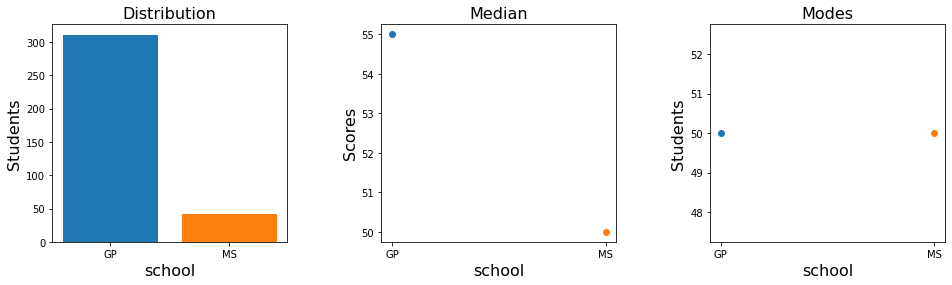

{'GP': 311, 'MS': 41}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 sex              F             182        52.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 sex              M             170        48.0        60.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

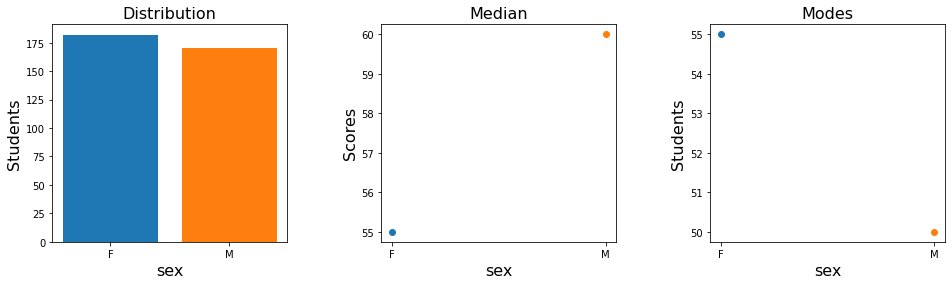

{'F': 182, 'M': 170}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              16             96        27.0        57.5       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              17             90        26.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              15             76        22.0        60.0       65.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              18             69        20.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              19             16         5.0        55.0       60.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              20              3         1.0        75.0       70.0 

 Feature        V

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

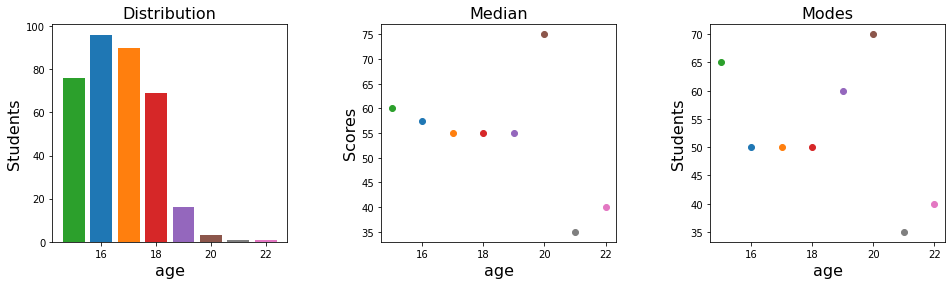

{16: 96, 17: 90, 15: 76, 18: 69, 19: 16, 20: 3, 22: 1, 21: 1}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 address          U             265        78.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 address          R              73        22.0        50.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

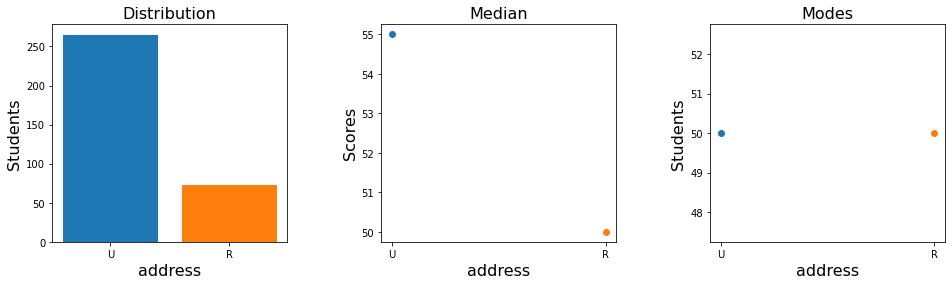

{'U': 265, 'R': 73}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 famsize          GT3           228        70.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 famsize          LE3           100        30.0        57.5       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

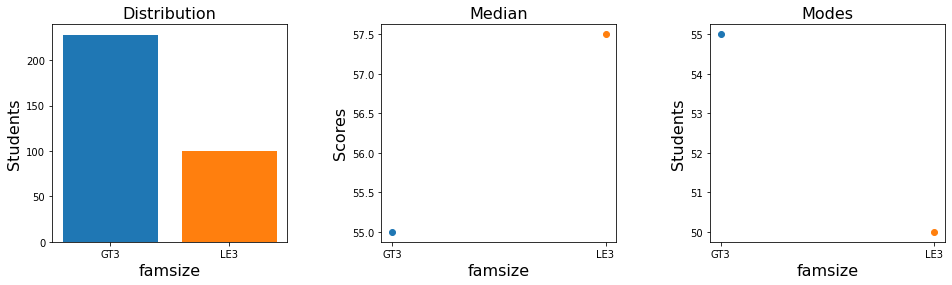

{'GT3': 228, 'LE3': 100}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 Pstatus          T             277        89.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Pstatus          A              34        11.0        55.0       55.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

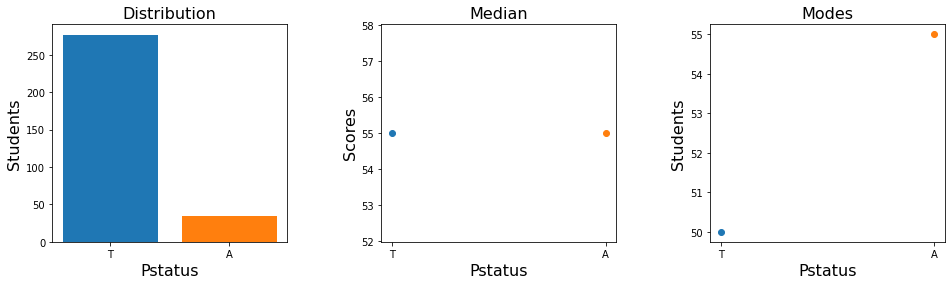

{'T': 277, 'A': 34}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 Medu             4.0           125        36.0        65.0       75.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Medu             2.0            88        25.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Medu             3.0            87        25.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Medu             1.0            47        13.0        50.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Medu             0.0             3         1.0        75.0       75.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

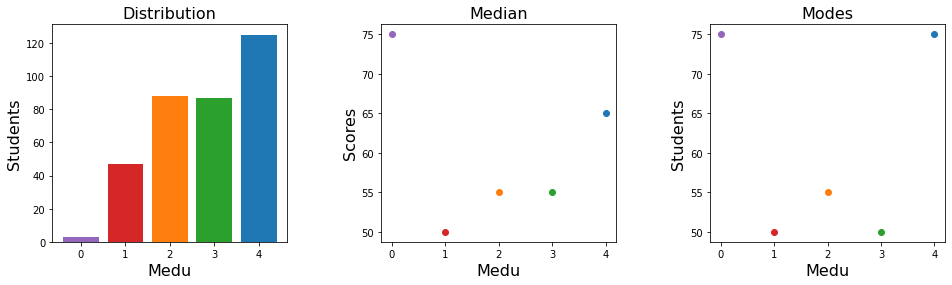

{4.0: 125, 2.0: 88, 3.0: 87, 1.0: 47, 0.0: 3}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fedu             2.0            94        28.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fedu             3.0            89        27.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fedu             4.0            81        24.0        60.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fedu             1.0            65        20.0        50.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fedu             0.0             2         1.0        65.0       65.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

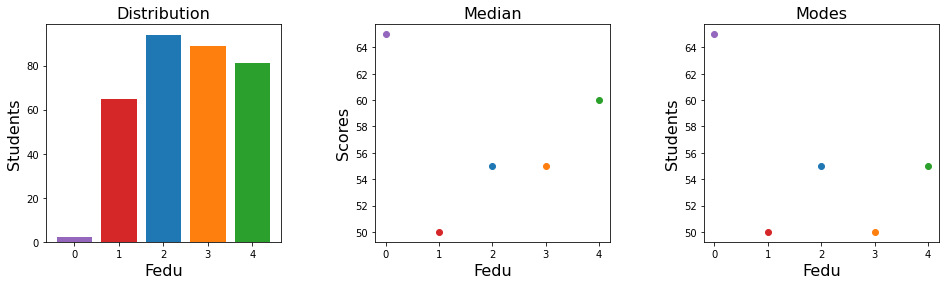

{2.0: 94, 3.0: 89, 4.0: 81, 1.0: 65, 0.0: 2}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 Mjob             other         115        34.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Mjob             services       90        27.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Mjob             teacher        51        15.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Mjob             at_home        49        15.0        50.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Mjob             health         30         9.0        65.0       75.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

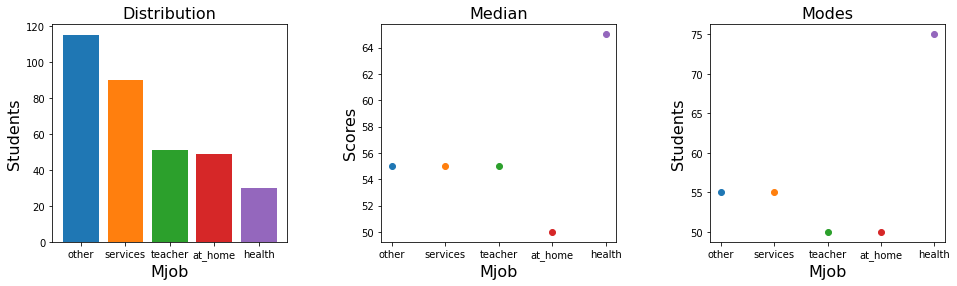

{'other': 115, 'services': 90, 'teacher': 51, 'at_home': 49, 'health': 30}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fjob             other         176        55.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fjob             services       89        28.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fjob             teacher        26         8.0        70.0       74.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fjob             health         15         5.0        55.0       40.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fjob             at_home        14         4.0        57.5       55.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

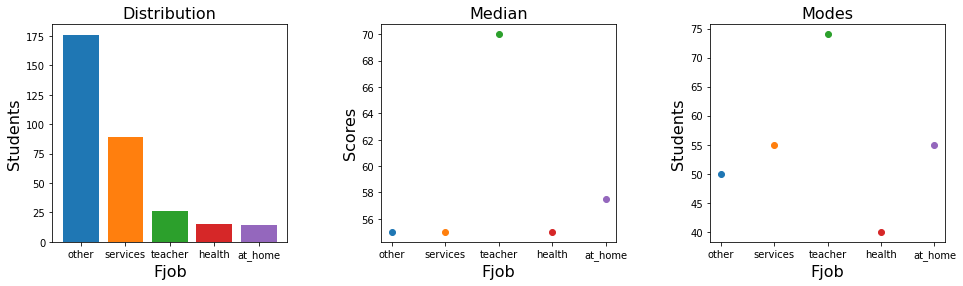

{'other': 176, 'services': 89, 'teacher': 26, 'health': 15, 'at_home': 14}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 reason           course        119        35.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 reason           reputation      96        28.0        60.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 reason           home           89        26.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 reason           other          33        10.0        55.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

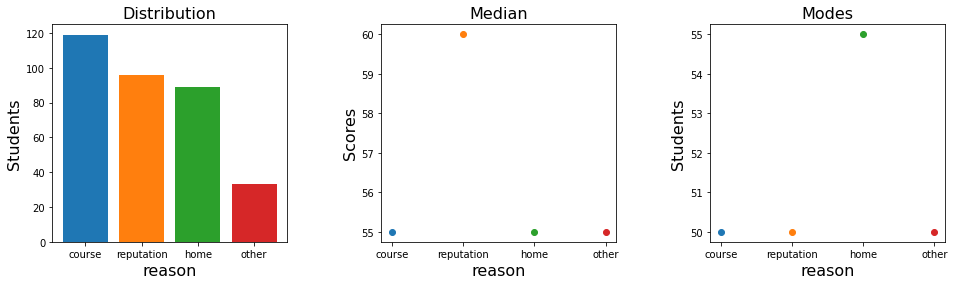

{'course': 119, 'reputation': 96, 'home': 89, 'other': 33}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 guardian         mother        225        70.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 guardian         father         78        24.0        57.5       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 guardian         other          20         6.0        52.5       40.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

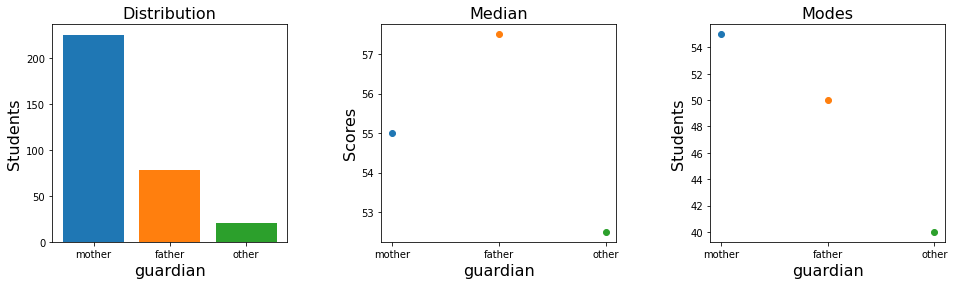

{'mother': 225, 'father': 78, 'other': 20}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 traveltime       1.0           219        67.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 traveltime       2.0            86        26.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 traveltime       3.0            17         5.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 traveltime       4.0             7         2.0        50.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

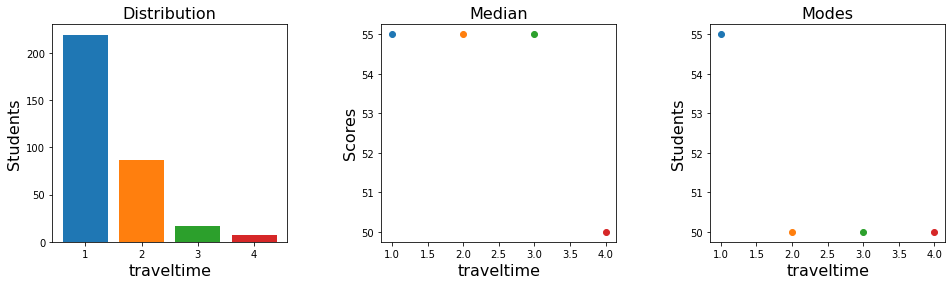

{1.0: 219, 2.0: 86, 3.0: 17, 4.0: 7}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 studytime        2.0           173        50.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 studytime        1.0            90        26.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 studytime        3.0            58        17.0        60.0       70.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 studytime        4.0            24         7.0        62.5      53.75 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

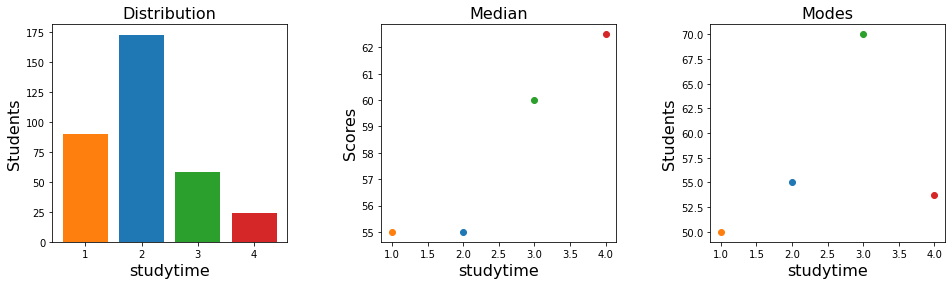

{2.0: 173, 1.0: 90, 3.0: 58, 4.0: 24}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 failures         0.0           273        82.0        55.0       52.5 

 Feature        Value           Obs.      % Obs      Median       Mode 
 failures         1.0            38        11.0        50.0       40.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 failures         2.0            11         3.0        45.0       45.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 failures         3.0            10         3.0        42.5       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

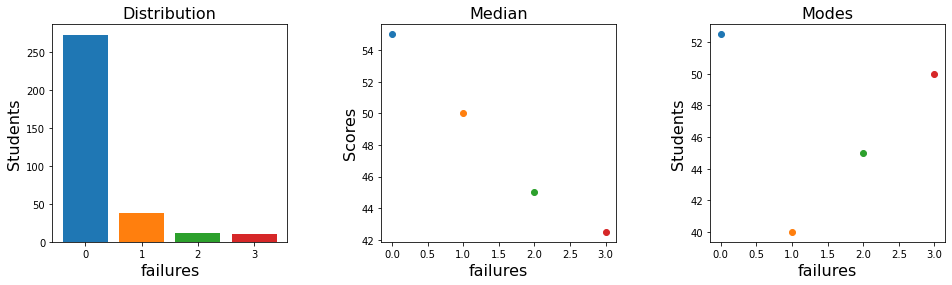

{0.0: 273, 1.0: 38, 2.0: 11, 3.0: 10}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 schoolsup        no            295        86.0        60.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 schoolsup        yes            48        14.0        50.0       55.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

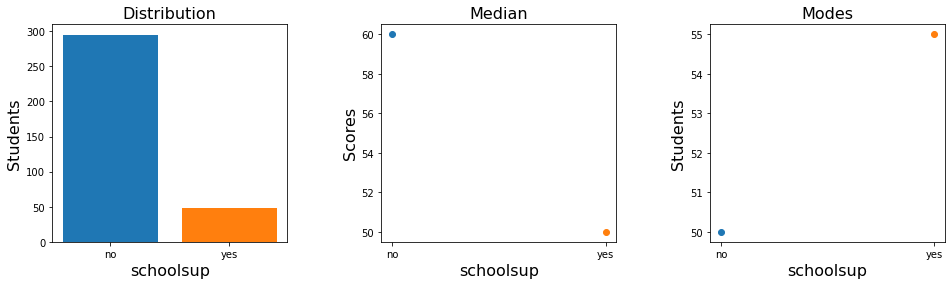

{'no': 295, 'yes': 48}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 famsup           yes           196        62.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 famsup           no            120        38.0        55.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

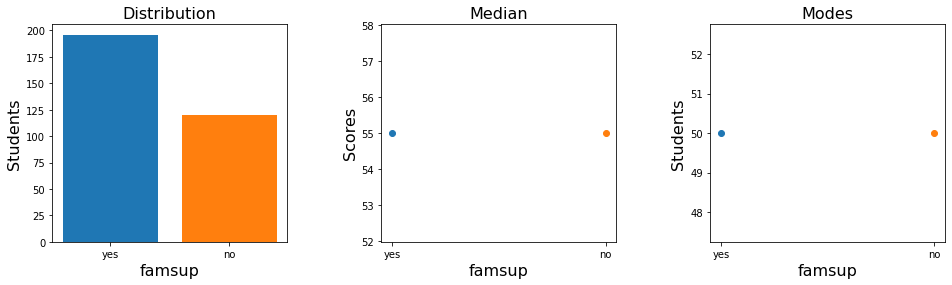

{'yes': 196, 'no': 120}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 paid             no            170        54.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 paid             yes           146        46.0        55.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

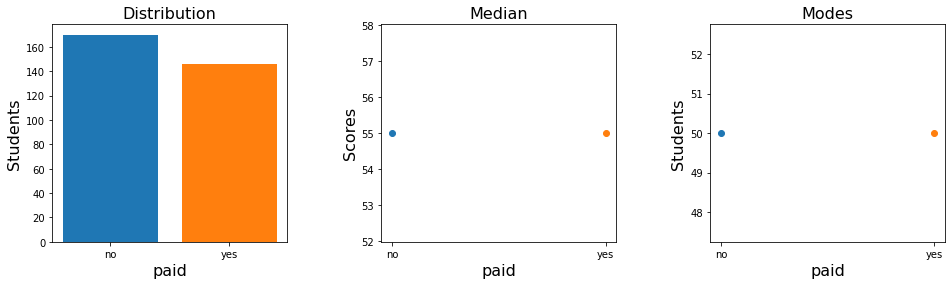

{'no': 170, 'yes': 146}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 activities       yes           172        51.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 activities       no            168        49.0        55.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

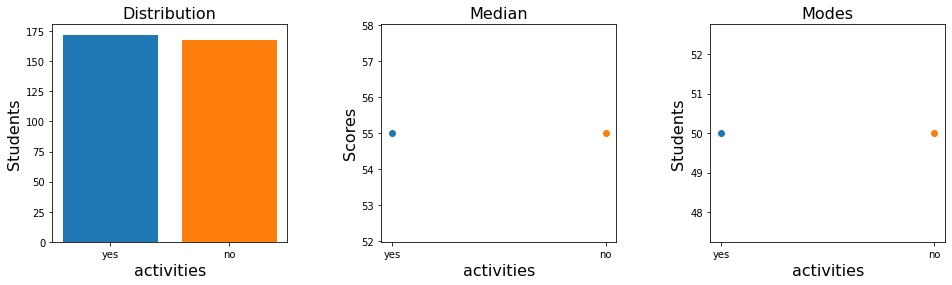

{'yes': 172, 'no': 168}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 nursery          yes           272        80.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 nursery          no             68        20.0        55.0       55.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

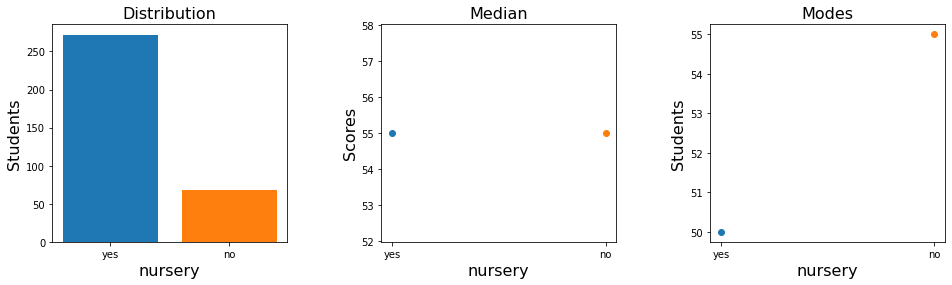

{'yes': 272, 'no': 68}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 higher           yes           320        96.0        55.0       52.5 

 Feature        Value           Obs.      % Obs      Median       Mode 
 higher           no             13         4.0        50.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

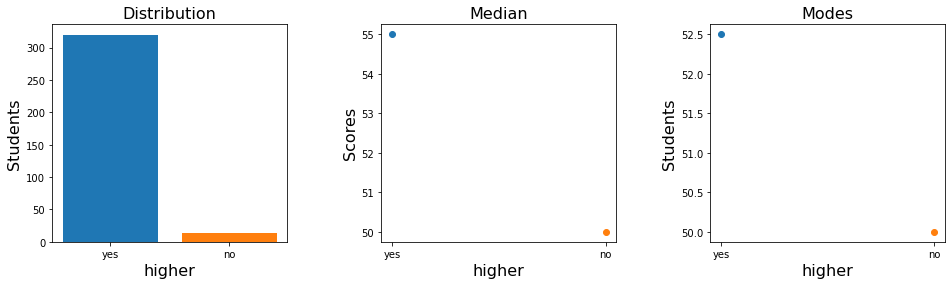

{'yes': 320, 'no': 13}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 internet         yes           274        85.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 internet         no             49        15.0        55.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

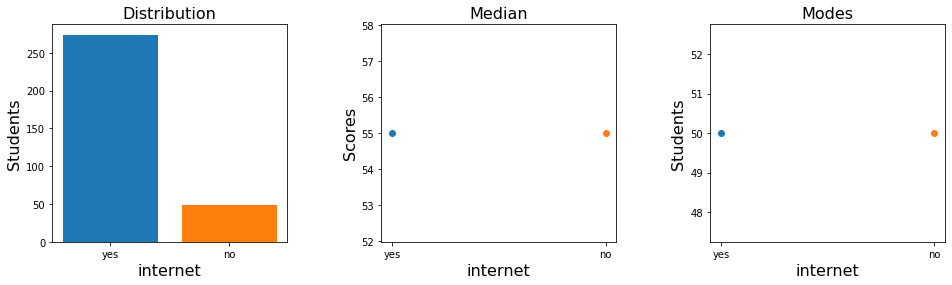

{'yes': 274, 'no': 49}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 romantic         no            219        68.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 romantic         yes           104        32.0        55.0       55.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

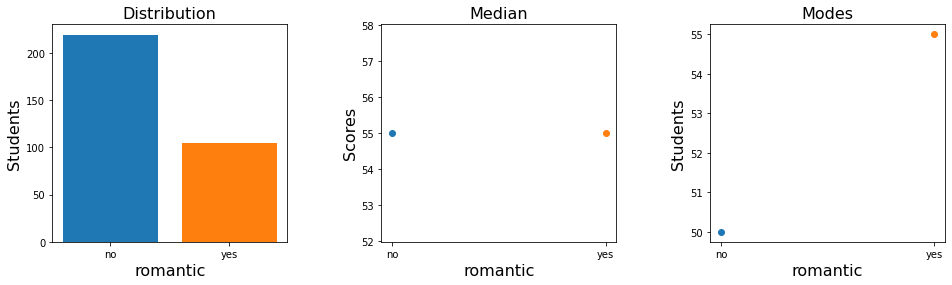

{'no': 219, 'yes': 104}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 famrel           4.0           163        50.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 famrel           5.0            88        27.0        60.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 famrel           3.0            56        17.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 famrel           2.0            14         4.0        57.5       65.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 famrel           1.0             7         2.0        60.0       62.5 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

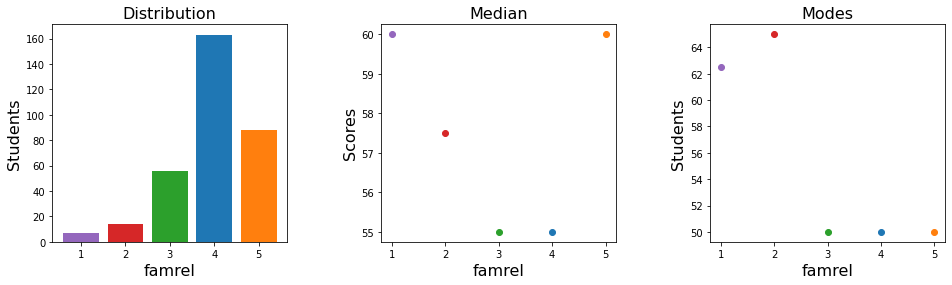

{4.0: 163, 5.0: 88, 3.0: 56, 2.0: 14, 1.0: 7}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 freetime         3.0           132        38.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 freetime         4.0           102        30.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 freetime         2.0            59        17.0        60.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 freetime         5.0            35        10.0        60.0       60.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 freetime         1.0            16         5.0        50.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

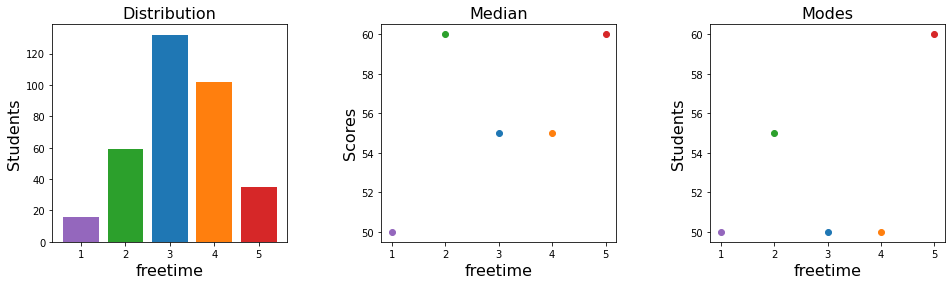

{3.0: 132, 4.0: 102, 2.0: 59, 5.0: 35, 1.0: 16}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 goout            3.0           118        34.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 goout            2.0            92        27.0        60.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 goout            4.0            74        21.0        52.5       40.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 goout            5.0            43        12.0        50.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 goout            1.0            19         5.0        55.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

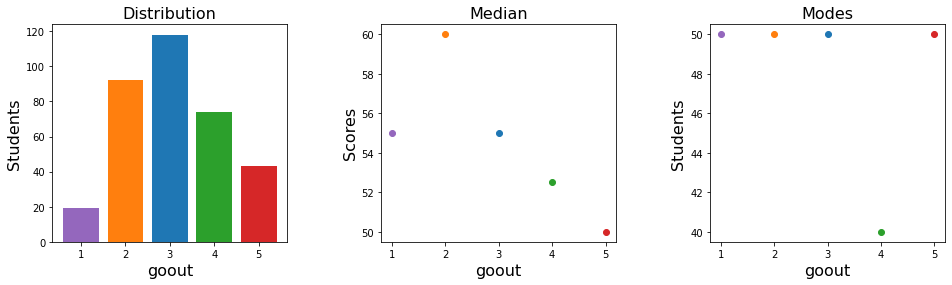

{3.0: 118, 2.0: 92, 4.0: 74, 5.0: 43, 1.0: 19}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 health           5.0           124        37.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 health           3.0            81        24.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 health           4.0            53        16.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 health           1.0            45        13.0        65.0       75.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 health           2.0            36        11.0        62.5       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

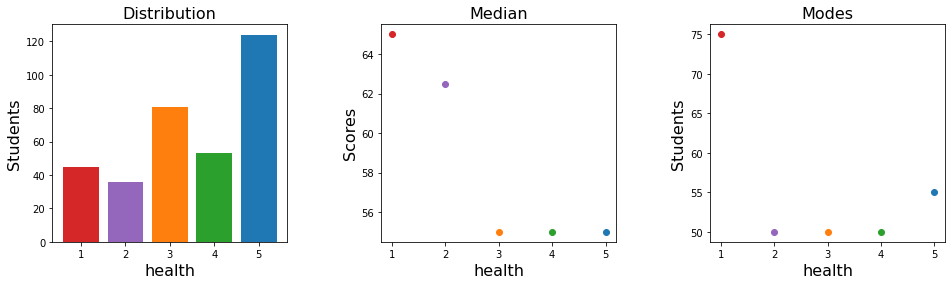

{5.0: 124, 3.0: 81, 4.0: 53, 1.0: 45, 2.0: 36}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         0.0            74        22.0        60.0       75.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         2.0            60        18.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         4.0            52        15.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         6.0            30         9.0        60.0      61.67 

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         8.0            20         6.0        50.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         10.0           17         5.0        55.0     

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

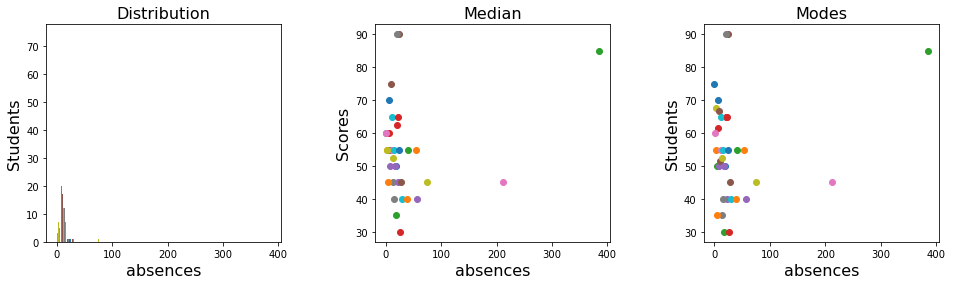

{0.0: 74, 2.0: 60, 4.0: 52, 6.0: 30, 8.0: 20, 10.0: 17, 12.0: 12, 14.0: 12, 3.0: 7, 16.0: 7, 7.0: 6, 5.0: 5, 18.0: 5, 20.0: 4, 22.0: 3, 9.0: 3, 1.0: 3, 15.0: 2, 13.0: 2, 11.0: 2, 25.0: 1, 54.0: 1, 385.0: 1, 26.0: 1, 56.0: 1, 24.0: 1, 212.0: 1, 21.0: 1, 75.0: 1, 30.0: 1, 19.0: 1, 38.0: 1, 40.0: 1, 23.0: 1, 17.0: 1, 28.0: 1}
_____________________________________________________________________



In [97]:
# Ненулевой сет
# Приступим к рассмотрению ненулевого сета, содержащего основной массив наблюдений

dfnz = df[df.score > 0]

# Для начала посмотрим как наши признаки распределены по значениям и каким результатам соответствует каждое значение. 
# После этого изучим взаимосвязь признаков которая может помочь нам при построении модели.

# Запускаем метод processor.

processor.distrandscore(dfnz)

In [98]:
# Мы видим что в среднем:

# 1) В школe GP результаты выше, на неё приходится 90% студентов. 
# Посмотрим, как распределены по школам студенты живущие за городом и в городе.

display(
    round(dfnz.groupby(['school']).address.value_counts(normalize=True)*100, 2))

school  address
GP      U          82.39
        R          17.61
MS      R          54.05
        U          45.95
Name: address, dtype: float64

In [99]:
# В школе GP учатся преимущественно городские студенты, в то время как в школе MS преобладают студенты живущие за городом. 
# Видимо школа GP находится в центре города, в то время как школа MS находится на периферии.

# 2) Результаты юношей выше чем результаты девушек, в процентном соотношении девушек немного больше чем юношей.

# 3) Возраст студентов 15- 22 г., при этом 94% не старше 18 лет. 
# Медианные результаты студентов в возрасте 16-19 лет равны 55 баллам. 
# Для 15-летних медианное значение выше (60), для 20-ти лет аномально высокая (2 аномально высоких наблюдения). 
# Более возрастные студенты показывают результаты ниже среднего. 
# В целом отутствует устойчивая тенденция изменения результатов с увеличением возраста. 
# В таком виде в каком есть, признак не информативен возможно у юношей и девушек тенденции изменения медианных результатов 
# с возрастом будет иметь различный характер? Проверим это предположение.

dfnz.groupby(["sex", "age"]).score.agg(['median', pd.Series.mode, "count"]).T

sex      F                                   M                                \
age     15  16  17  18            19  20    15  16  17  18  19            20   
median  55  55  55  55            55  75  67.5  60  55  50  50          67.5   
mode    55  55  75  50  [55.0, 65.0]  75    75  75  50  40  40  [45.0, 90.0]   
count   34  50  53  34            10   1    42  46  37  35   6             2   

sex             
age     21  22  
median  35  40  
mode    35  40  
count    1   1

In [100]:
# Медианные значения у девушек неизменны до аномального значения у двацатилетней студентки. 
# модальное значение максимально у 17-тилетних студенток. 
# А вот у юношей медианный и модальный пики приходлятся на 15-16 лет, после чего результаты значитедьно проседают. 
# Следовательно юношей желательно мотивировать на раннюю сдачу экзаменов.

# 5) У живущих в городе, результаты выше

# 6) Размер семьи и её статус на результаты не влияют.

# 7) Наблюдается тенденция более высоких результатов у студентов матерей с более высоким образованием. 
# Скорее всего здесь играет роль личный пример образованных матерей, их умение мотивировать, 
# возможно также что благодаря образованию и возможности заниматься хорошо оплачиваемым квалифицированным трудом 
# позволяет им обеспечивать своим детям комфортные условия обучения.
# Обращает на себя внимание большой процент высокообразованных матерей (36%), 
# это самая значительная доля среди всех уровней образования.

# У трёх студентов чьи матери не имели образование зафиксирован высокий медианный результат скорее всего имеет место попытка 
# детей добиться чего-то большего чем удалось матери. Посмотрим, из каких результатов он сложен.


dfnz[dfnz.Medu == 0].score

127    45.0
249    75.0
324    75.0
Name: score, dtype: float64

In [101]:
# Как мы видим у этих двух студентов очень хорошие результаты, 
# соотетствующие модальным значениям детей высокообразованных матерей.

# Итак у двоих по 75 баллов и у одного 45. Посмотрим, как соотносятся их признаки. 
# Для этого найдём признаки для студентов набравших 75 баллов по которым наблюдается совпадение. 
# После это сопоставим значения этих признаков со значениями признаков у студента набравшего 15 баллов.

b = dfnz[dfnz.Medu == 0].T
b[b[249] == b[324]].T

,school,address,Pstatus,Medu,Fedu,failures,schoolsup,famsup,activities,higher,internet,romantic,freetime,absences,score
127,GP,U,T,0,1,3,no,NaN,no,no,no,no,4,2,45
249,GP,U,T,0,2,0,no,no,no,yes,yes,no,3,0,75
324,GP,U,T,0,2,0,no,no,no,yes,yes,no,3,0,75


In [102]:
dfnz.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [103]:
# Мы видим что по параметрам school, address, Pstatus, Medu, schoolsup. activities и romantic, все три три наблюдения сходятся.
# Но у набравшеего 45 баллов мы имеем следующие расхождения:

# более низкий уровень образования отца

# Целых три внеучебных неудачи

# Нежелание получать высшее образование

# отсутствие интернета

# больше свободного времеени

# Возможно при большем количестве наблюдений с Medu=0 мы могли бы сделать вывод о том какие результаты более характерны 
# для этой группы наблюдений. Пока же нам остаётся констатировать, 
# что для Medu=0 у нас отсутствует возможность прогнозировать результаты экзамена. 
# В принципе этой группой наблюдений мы можем принебречь. Но пока мы делать этого не будем.

# 8) Уровень образования отцов как не странно ниже. 
# Высшее образование имеют только 23% отцов, а пик приходится на уровень образования 5-9 классов.
# С образованием отцов такая же тенденция роста, и также аномально высокое медианное среднее значения у детей необразованных отцов.

dfnz[dfnz.Fedu == 0].score.value_counts().sort_index()

50.0    1
80.0    1
Name: score, dtype: int64

In [104]:
# Мы приходим к выводу, что дети имеющие одного необразованного родителя 
# либо учатся слабо и получают на экзамене 45-50 баллов, либо 75-80 баллов. 
# Если бы наблюдений для этой группы у нас было бы больше, имело бы смысл уточнение влияния на оценку иных параметров.
# Пока же мы оставляем целесообразность использования этих данных под вопросом, но из датасета их не убираем.

# Посмотрим на различия в профилях

b = dfnz[dfnz.Fedu == 0].T
b[b[76] != b[171]].T

,age,famsize,Medu,Mjob,reason,studytime,failures,famsup,paid,higher,romantic,famrel,freetime,goout,health,absences,score
76,15,NaN,4,teacher,course,4,0,no,no,NaN,no,3,4,3,1,8,50
171,16,GT3,1,other,reputation,2,NaN,yes,yes,NaN,yes,4,3,2,3,2,80


In [105]:
# Высокие результаты у студента отличающегося следующими значениями признаков:

# Его мать окончила только начальную школу.
# В школу он пришёл руководствуясь сведениями о её хорошей репутации
# Имеет более тёплые семейные отношения, и семейную поддержку обучения
# имеются романтические отношения,при среднем количестве свободного времени с друзьями времени проводит мало.
# Здоровье среднее (у другого студента очень плохое).
# 9) Род занятий 37% матерей неизвестен у их детей медианный результат 55 баллов, 
# такой же как у детей матерей занятых на госслужбе и образовании. 
# Самые высокие медианные баллы у студентов чьи матери заняты в сфере здравохраниения, 
# самые низкие у детей неработающих матерей.

# 10) По занятости отцов у нас ещё меньшее информации, 56% из них относится к категории other.
# У детей неработающих отцов баллы выше чем у детей отцов занятых на госслужбе, 
# здравохранении и иных областях профессиональной деятельности. 
# Самые высокие баллы у студентов чьи отцы заняты преподавательской деятельностью. 
# Дети преподавателей намного результативнее детей отцов других профессий, это очень сильный критерий,
# который должен использоваться отдельно (бинарный параметр "преподаватель/не преподаватель")!!!

# 11) Итак, почему наши учащиеся выбрали свою школу, и как эти критерии выбора коррелируют с их успеваемостью? 
# 35% выбрали школу с учётом программы образования, их медианные результаты близки результатам студентов с другими критериями 
# выбора, и немного уступают результатам тех, кто выбрал школу исходя из её репутации. Последние самые мотивированные

# 12) У 69% учащихся опекуном явлется мать, у 6% опекун не является отцом или матерью. 
# У опекунов отцов дети достигают чуть лучшие результатов, самые низкие у студентов опекаемых неродителяими.

# 13) Для групп 0-3 образующих 98% выборки, средняя медианная оценка не зависит от расстояния и снижтся только у студентов, 
# тратящих на дорогу 45-60 минут. 2/3 студентов живут на расстоянии 15 минут, 
# а чуть больше четверти студентов тратят на дорогу 15-30 минут.

# 14) Чем больше студенты учатся тем выше у них в среднем результаты, зависимость более чем очевидная. 
# При этом результаты у тех кто тратил на учёбу менее двух часов в неделю и тех кто тратил от двух до 5 часов различаются 
# не значительно, но значимо отличны от тех кто тратил на учёбу 5-10 и более 10 часов 
# (результаты этих двух проследних групп также близки между собой). 
# Таким образом после увеличения часов обучения в неделю свыше 5, фиксируется значимый прирост результата на экзамене 
# (переход количества в качество. здесь возможно имеет смысл бинаризировать значения с разбивкой на "менее и более 5 часов".

# 15) 82% студентов не имело внеурочных неудач и они набрали в 60 баллов по медиане.
# К сожалению, у терпевших неудачу медианнный результат снижается, после двух неудач он перестяёт падать

# 16) Подавляющее большинство студентов (78%) имеют хорошие и отличные отношеения в семье. 
# Поэтому выборка с оставшимися студентами имеющими средние и плохие отношения с родителями является несбалансированной
# и выводы делаемые по ней могут быть сомнительными. Однако, если предположить что тенденция раскрывающаяся 
# в этой части наблюдений устойчива, мы приходим к выводу, что лучших результатов достигают те студенты нашего сета 
# у кого семейные отношения являются отличными (видимо более высокая самооценка, стремление быть гордостью своей семьи)
# и те у кого в семье отвратительные отношения (для них это шанс вырваться из семьи благодаря учёбе), 
# а остальные срезы по семейным отношениям имеют равные медианные результаты. 

# Посмотрим на распределение успеваемости у группы с худшими семейными отношениями.

dfnz.query('famrel==1').score.value_counts().sort_index()

40.0    1
55.0    1
60.0    2
65.0    2
80.0    1
Name: score, dtype: int64

In [106]:
# Они определённо стараются! Почти у всех результаты выше 50 баллов. 
# Нужно либо загрубить данные снижением размерности (1, 2-3, 4), либо углубляться в них используя feature engineering.

# 17) У получающих школьную поддержку результаты ниже (без неё наверно были бы ещё ниже ).

# 18) Семейная поддержка, платные занятия по математике, внеурочная деятельносить, детсадовский овыт, 
# наличие доступа к интернету и состояние в романтических отншениях, значимо на медианный результат не влияют.

# 19) подавляющее большинство учащихся(96%) хочет получить высшее образование, 
# их медианный результат на 10% выше тех кто не стремится в ВУЗ.

# 20) Признак наличия свободного времени имеет распределение близкое к нормальному, 
# пик значений признака (39% наблюдений) приходится на среднее по продолжительности время (оценка 3). 
# Значимо на результативность не влияет.

# 21) Признак времени проводимого с друзьями, тоже нормально распределённый признак. 
# Максимум встречаемости приходится на оценку 3, максимальных результатов достигают имеющие значение признака равного 2. 
# Оценке 5 соответствует минимальная успеваемость, видимо общение с друзьями всё-таки расхолаживает выпускников. 
# При этом оценки для групп 1, 3 и 4- одинаковы.

# 22) Здоровье. Здесь у нас одинаковые и лучшие результаты у двух групп со слабым здоровьем, 
# у более здоровых однокашников резульаты также одинаковые и более низкие. выше чем у их более здоровых однокашников. 
# Тут тоже могут быть объяснение- компенсаторно они больше внимания уделяют учёбе. Позицию лучше тоже бинаризировать.

# 23) Распределение с очень тяжёлым правым хвостом.
# 22% студентов были на всех лекциях.Интересным феноменом является крайне ярко выраженное преобладжание чётного количества 
# пропусков, полностью затухающее в районе 24 пропусков (далее идёт хвост из единичных значений, длиной в 12 наблюдений.
# Признак в существующем виде использовать нельзя.
# Необходимо уменьшить количество уровней изменения величины объединяя соседствующие чётные и нечётные количества отсутств
# на занятиях, а также удалить хвостовые значения >24 пропусков.

# 17) У получающих школьную поддержку результаты ниже (без неё наверно были бы ещё ниже ).

# 18) Семейная поддержка, платные занятия по математике, внеурочная деятельносить, детсадовский овыт, 
# наличие доступа к интернету и состояние в романтических отншениях, значимо на медианный результат не влияют.

# 19) подавляющее большинство учащихся(96%) хочет получить высшее образование, 
# их медианный результат на 10% выше тех кто не стремится в ВУЗ.

# 20) Признак наличия свободного времени имеет распределение близкое к нормальному, 
# пик значений признака (39% наблюдений) приходится на среднее по продолжительности время (оценка 3).
# При этом близкие по значенниям пики медианных результатов приходятся на оценки 2 и 5.
# Таким образом лучших результатов достигают те кто ограничены в свободном времени (но не слишком) и 
# те у кого его очень много (и видимо находится время не только на отдых и развлечения но и на учёбу). 
# Значимо на результативность не влияет.

# 21) Ещё одна нелинейная зависимость! Оптимум результатов при проведении с друзьями меньше среднего, 
# у тех кто проводит время мало результативность как у тех кто проводит с друзьями среднее количество времени. 
# таким образом возникает рекомендация: Ограничивать это время но не всводить к минимуму.

# 22) Здоровье. Здесь у нас одинаковые и лучшие результаты у двух групп со слабым здоровьем,
# у более здоровых однокашников резульаты также одинаковые и более низкие. выше чем у их более здоровых однокашников. 
# Тут тоже могут быть объяснение- компенсаторно они больше внимания уделяют учёбе. Позицию лучше тоже бинаризировать.

# 23) Распределение с очень тяжёлым правым хвостом. 
# 22% студентов были на всех лекциях.Интересным феноменом является крайне ярко выраженное преобладжание чётного количества пропусков, 
# полностью затухающее в районе 24 пропусков (далее идёт хвост из единичных значений, длиной в 12 наблюдений

# Посмотрим связано ли наличие пропусков успеваемостью.

dfnz.shape
dfnz.score.groupby([dfnz.absences == 0]).agg(
    ['min', 'max', 'mean', 'median', pd.Series.mode])


,min,max,mean,median,mode
absences,,,,,
False,20.0,100.0,56.366906,55.0,50.0
True,30.0,95.0,62.972973,60.0,75.0


In [52]:
# У нас получаются вполне объяснимые результаты, успеваемость тех кто пропускал оказывается немного выше успеваемости 
# тех кто не пропустил ни одного занятия.

# Для этого сета мы также проведём изучение характера распределения признаков, а также,
# посмотрим как для этих групп отличаются медианные значения результатов экзамена.

for idx, i in enumerate(dfnz.columns):
    vals = dfnz.groupby(i).median().round(1)
    vals['Qty'] = dfnz[i].value_counts().sort_index()
    display(vals)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
school,,,,,,,,,,,,,
GP,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,311
MS,18,3.0,2.0,2.0,2.0,0.0,4.0,3.0,3.0,3.0,3.0,50.0,41


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
sex,,,,,,,,,,,,,
F,17,3.0,2.5,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,55.0,182
M,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,60.0,170


,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
age,,,,,,,,,,,,
15,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,2.0,60.0,76
16,3.0,2.5,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,57.5,96
17,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,55.0,90
18,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,5.0,55.0,69
19,2.5,1.5,1.0,2.0,1.0,4.0,3.0,3.0,3.0,12.0,55.0,16
20,3.0,2.0,1.0,2.0,2.0,5.0,5.0,3.0,4.0,4.0,75.0,3
21,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0,1
22,3.0,1.0,1.0,1.0,3.0,5.0,4.0,5.0,1.0,16.0,40.0,1


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
address,,,,,,,,,,,,,
R,17,2.5,2.0,2.0,2.0,0.0,4.0,3.0,3.0,4.0,5.5,50.0,73
U,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,265


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
famsize,,,,,,,,,,,,,
GT3,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,228
LE3,17,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,57.5,100


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
Pstatus,,,,,,,,,,,,,
A,16.5,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,6.5,55.0,34
T,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,277


,age,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
Medu,,,,,,,,,,,,
0.0,17,2.0,1.0,2.0,0.0,3.0,3.0,2.0,5.0,0.0,75.0,3
1.0,17,1.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,2.0,50.0,47
2.0,16,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,88
3.0,17,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,87
4.0,16,4.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,65.0,125


,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
Fedu,,,,,,,,,,,,
0.0,15.5,2.5,2.0,3.0,0.0,3.5,3.5,2.5,2.0,5.0,65.0,2
1.0,17.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,50.0,65
2.0,16.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,3.5,4.0,55.0,94
3.0,17.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,55.0,89
4.0,16.0,4.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,60.0,81


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
Mjob,,,,,,,,,,,,,
at_home,17,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,50.0,49
health,16,4.0,3.0,1.0,2.0,0.0,4.0,4.0,3.0,4.0,4.0,65.0,30
other,17,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,55.0,115
services,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,5.0,55.0,90
teacher,16,4.0,3.0,1.0,2.0,0.0,4.0,4.0,3.0,4.0,4.0,55.0,51


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
Fjob,,,,,,,,,,,,,
at_home,17.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.5,57.5,14
health,16.0,3.0,4.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,15
other,16.5,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,176
services,17.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,3.5,4.0,55.0,89
teacher,16.5,4.0,4.0,1.0,2.0,0.0,4.0,3.5,3.0,4.0,5.5,70.0,26


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
reason,,,,,,,,,,,,,
course,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,3.0,55.0,119
home,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,55.0,89
other,16.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,5.0,55.0,33
reputation,16.5,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,6.0,60.0,96


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
guardian,,,,,,,,,,,,,
father,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,57.5,78
mother,16,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,225
other,19,2.5,2.0,1.0,2.0,1.0,4.0,4.0,3.0,3.0,10.0,52.5,20


,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
traveltime,,,,,,,,,,,,
1.0,16,3.0,3.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,219
2.0,17,3.0,2.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,55.0,86
3.0,17,2.0,3.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,17
4.0,17,2.0,1.0,2.0,0.0,4.0,3.0,5.0,4.0,6.0,50.0,7


,age,Medu,Fedu,traveltime,failures,famrel,freetime,goout,health,absences,score,Qty
studytime,,,,,,,,,,,,
1.0,16,3.0,2.0,1.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,90
2.0,17,3.0,3.0,1.0,0.0,4.0,3.0,3.0,3.0,4.0,55.0,173
3.0,17,3.0,3.0,1.0,0.0,4.0,3.0,3.0,4.0,4.0,60.0,58
4.0,16,3.0,2.0,1.0,0.0,4.0,3.0,3.0,3.0,5.0,62.5,24


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,score,Qty
failures,,,,,,,,,,,,
0.0,16,3.0,3.0,1.0,2.0,4.0,3.0,3.0,4.0,4.0,55.0,273
1.0,18,2.5,2.0,1.0,2.0,4.0,4.0,3.5,5.0,12.0,50.0,38
2.0,16,3.0,2.0,2.0,2.0,4.0,3.5,3.0,3.0,8.0,45.0,11
3.0,17,1.5,1.0,1.0,1.0,4.5,4.0,4.0,4.0,4.0,42.5,10


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
schoolsup,,,,,,,,,,,,,
no,17,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,60.0,295
yes,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,3.5,4.0,50.0,48


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
famsup,,,,,,,,,,,,,
no,17,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,55.0,120
yes,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,196


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
paid,,,,,,,,,,,,,
no,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,170
yes,16.5,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,146


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
activities,,,,,,,,,,,,,
no,17,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,55.0,168
yes,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,172


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
nursery,,,,,,,,,,,,,
no,17,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,3.5,4.0,55.0,68
yes,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,272


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
higher,,,,,,,,,,,,,
no,18.0,2.0,1.0,2.0,1.0,1.0,4.0,3.0,3.0,3.0,3.5,50.0,13
yes,16.5,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,320


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
internet,,,,,,,,,,,,,
no,17,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,49
yes,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,274


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Qty
romantic,,,,,,,,,,,,,
no,16,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,55.0,219
yes,17,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,6.0,55.0,104


,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,score,Qty
famrel,,,,,,,,,,,,
1.0,16.0,4.0,3.0,1.0,2.0,0.0,3.0,2.0,1.0,6.0,60.0,7
2.0,16.0,3.0,3.0,1.0,2.0,0.0,3.0,3.5,3.0,7.5,57.5,14
3.0,16.0,3.0,2.0,1.0,2.0,0.0,3.0,3.0,3.0,4.0,55.0,56
4.0,17.0,3.0,3.0,1.0,2.0,0.0,3.0,3.0,4.0,4.0,55.0,163
5.0,16.5,3.0,3.0,1.0,2.0,0.0,3.0,3.0,4.0,4.0,60.0,88


,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score,Qty
freetime,,,,,,,,,,,,
1.0,17,3.0,2.5,1.0,2.0,0.0,4.0,2.0,3.0,5.0,50.0,16
2.0,17,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,60.0,59
3.0,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,55.0,132
4.0,17,3.0,3.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,55.0,102
5.0,16,3.0,2.0,1.0,2.0,0.0,4.0,4.0,4.0,4.0,60.0,35


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,score,Qty
goout,,,,,,,,,,,,
1.0,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,2.0,55.0,19
2.0,16,3.0,2.0,1.0,2.0,0.0,4.0,3.0,4.0,2.0,60.0,92
3.0,17,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,55.0,118
4.0,17,3.0,3.0,1.0,2.0,0.0,4.0,4.0,4.0,6.0,52.5,74
5.0,17,3.0,2.0,1.0,2.0,0.0,4.0,4.0,4.0,6.0,50.0,43


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,absences,score,Qty
health,,,,,,,,,,,,
1.0,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,65.0,45
2.0,16.5,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,62.5,36
3.0,17.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,55.0,81
4.0,17.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,55.0,53
5.0,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,55.0,124


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,score,Qty
absences,,,,,,,,,,,,
0.0,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,60.0,74
1.0,18.0,3.0,1.0,1.0,3.0,0.0,5.0,3.0,2.0,3.0,60.0,3
2.0,16.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,55.0,60
3.0,17.0,2.0,2.0,1.0,1.0,0.0,4.0,3.0,3.0,3.0,55.0,7
4.0,17.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,3.5,55.0,52
5.0,18.0,2.0,1.0,1.0,1.0,0.0,3.0,3.0,3.0,4.0,45.0,5
6.0,16.0,3.0,2.5,1.5,2.0,0.0,4.0,3.0,4.0,4.0,60.0,30
7.0,17.5,3.5,4.0,1.0,3.0,0.0,4.5,4.0,3.0,4.5,70.0,6
8.0,16.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,50.0,20


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Qty
score,,,,,,,,,,,,
20.0,17.0,4.0,3.0,1.0,2.0,2.0,3.0,4.0,5.0,1.0,22.0,1
25.0,17.0,3.0,2.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,14.0,7
30.0,16.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.5,3.5,6.0,15
35.0,17.0,3.0,1.0,1.0,2.0,1.0,4.0,4.0,3.0,4.0,5.0,9
40.0,17.0,2.0,3.0,1.0,2.0,0.0,4.0,3.0,4.0,4.0,6.0,31
45.0,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,6.0,27
50.0,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,54
55.0,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,46
60.0,17.0,2.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,2.0,31


In [53]:
# School) В отличии от нулевого сета, различия в образовательном уровне родителей несущественны. Учащиеся дольше добираются до школы MS.

# sex) У юношей по-прежнему более образованные матери, юноши более здоровые. В целом различия в значениях независимых признаков минимальные.

# age) С 15 по 18 лет внеучебные неудачи отсутствуют, но с 19 лет их количество линейно возрастает. После 19 лет оценка удовлетворённости отношениями в семье достигает максимума, скорее всего это возрастная переоценка.

# address) У живущих в городе более образованные родители, эти студенты меньше тратят времени на то чтобы добаться до школы.

# famsize) Уровень образования матерей теперь одинаковый но у отцов из больших семей образовательный уровень выше. Студенты из этих семей здоровее.

# Pstatus) paid), activities) nursery) romantic) studytime) reputation)значимо с другими параметрами не связаны. internet) связан только с уровнем образования родителей

# Medu) По прежнему наблюдается сильная зависимость между уровнем образования матерей и отцов.

# Fedu) Внеучебных неудач нет либо мало, с ростом образования отцов наблюдается снижение свободного времени у детей.

# Mjob) Как и в нулевом сете, самый высокий уровень образования у матерей занятых в области образования и здравохранения.

# Fjob) Медианную оценку образования как высшую имеют только отцы студентов знаятых в образовании, у этих же студентов самое хорошее здоровье и они тратят на дорогу больше времени. По свободному времени различий нет.

# Guardian) Чаще всего отец представителем в семьях с девятиклассным образование обоих родителей. В менее образованных таковыми являются матери и иные опекуны.

# traveltime) Время до школы обратно пропорционально сумме уровней образования родителей, по всей видимости обеспеченные родители селятся ближе к центру. По другим признакам зависимость не послеживается.

# failures) Сильная отрицательная зависимость от уровня образования отца сохраняется, при трёх и более неудач снижается время отводимое на учёбу вне школы и увеличивается времея проводимое с друзьями, а также становятся ещё лучше семейные отношения. Тут трудно разобраться где причина, а где следствие: либо эти признаки способствуют неудачам, либо студент нуждается в поддержке, поэтому большее внимание уделяет отношениям и общению с близкими ему людьми.

# scholsupport) Поддержку имеют чуть менее здоровые студенты

# famsupport) признак влияет на здоровье студента (хорошее вместо средего)

# higher) к высшему образованию больше тянутся дети родителей со средним образованием, тратящие мало времени на дорогу до школы и не имевшие внешкольных неудач. Они же и более результативные

# famrel) С ростом показателя мы видим и рост медианного здоровья учеников.

# Freetime) положительная не прямая связь со временем на общение с друзьями.

# goout) Ещё одна нелинейная зависимость! Оптимум результатов при проведении с друзьями меньше среднего, у тех кто проводит время мало результативность как у тех кто проводит с друзьями среднее количество времени. таким образом возникает рекомендация: Ограничивать это время но не всводить к минимуму.

# health) Здоровье слабо связано с другими независимыми признаками, а вот характер её связи с целевой переменной- скачкообразное снижение при среднем уровне здоровья. Видимо у детей со слабым здоровьем меньше отвлекающих факторов и компенсаторно они больше внимания уделяют учёбе. Напрашивается бинаризация.

# absences) Интересным феноменом является крайне ярко выраженное преобладание чётного количества пропусков, полностью затухающее в районе 24 пропусков (далее идёт хвост из единичных значений, длиной в 12 наблюдений.

# Выводы
# 1) Часть данных можно удалить поскольку они не определяют результативность на экзамене

# 2) Некоторые данные принимают несколько дискретных уровней с плато

# 3) Характер зависимости результата от порядковых значений ряда признаков временами имеет нелинейных характер, что необходимо учесть при моделировании.



In [107]:
# Мы видели что некоторым из признакам соответствует несколько уровней значений результатов на экзамене,
# при том что их количество оказывается меньшим количества значений принимаемых признаком. 
# Проведём загрубление данных, уберём признаки с постоянным значением медианного результата, 
# а также малочисленные наблюдения с родителями без образования (сильно зашумляют модель).

# dfnz.health=dfnz.health.apply(lambda x: 0 if x < 3 else 1)
dfnz.health = dfnz.health.apply(lambda x: 1 if x == 1 else 2 if x == 2 else 3)
dfnz.failures = dfnz.failures.apply(lambda x: 0 if x < 3 else 1)
dfnz.studytime = dfnz.studytime.apply(lambda x: 0 if x < 3 else 1)
dfnz.traveltime = dfnz.traveltime.apply(lambda x: 0 if x > 3 else 1)
dfnz.guardian = dfnz.guardian.apply(lambda x: 0 if x == "other" else 1)

C:\Users\777\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [108]:
dfnz.drop(['Pstatus', 'famsize', "Mjob", "famsup", "paid", "activities", "nursery",
           "internet", "romantic", "guardian"], axis=1, inplace=True)

C:\Users\777\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [109]:
dfnz = dfnz.query('Fedu>0 & Medu>0')

In [110]:
# Разбиение признаков на бинарные и мультинарные
# Как мы видели при изучении характера ораспределения признаков по значенеиям,
# в нашем сете достаточно много бинарных переменных. Нам необходимо понять, значимо ли их влиянее на целевой признак, 
# и исключить незначимые признаки из дальнейшего рассмотрения как бесполезные. 
# С помощью метода bin_nonbin_splitter, мы разделим наш датасет dfnz на подсеты бинарных (dfb) и небинарных признаков (dfnb).
# Каждый из которых мы будем изучать отдельно. Для оценки тесноты связи признаков каждого сета, 
# метод добавляет в бинарный сет целевой признак score.

dfb, dfnb = processor.bin_nonbin_splitter(dfnz)
print(
    f' Cет бинарных значений dfb: {dfb.shape} | Cет мультинарных значений dfnb: {dfnb.shape} ')

 Cет бинарных значений dfb: (324, 9) | Cет мультинарных значений dfnb: (324, 11) 


__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              16             88        27.0        60.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              17             82        25.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              15             69        21.0        60.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              18             65        20.0        50.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              19             15         5.0        55.0       60.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 age              20              3         1.0        75.0       70.0 

 Feature        Value           Obs.  

<ipython-input-1-4234cf782be1>:130: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 1)
<ipython-input-1-4234cf782be1>:135: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 3)
<ipython-input-1-4234cf782be1>:140: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

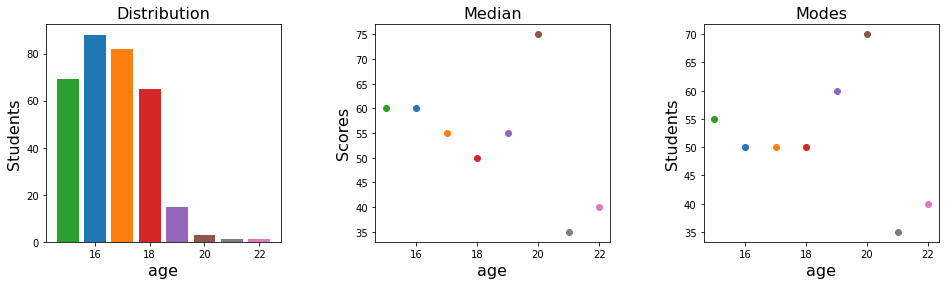

{16: 88, 17: 82, 15: 69, 18: 65, 19: 15, 20: 3, 22: 1, 21: 1}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 Medu             4.0           114        35.0        65.0       70.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Medu             2.0            85        26.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Medu             3.0            81        25.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Medu             1.0            44        14.0        50.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

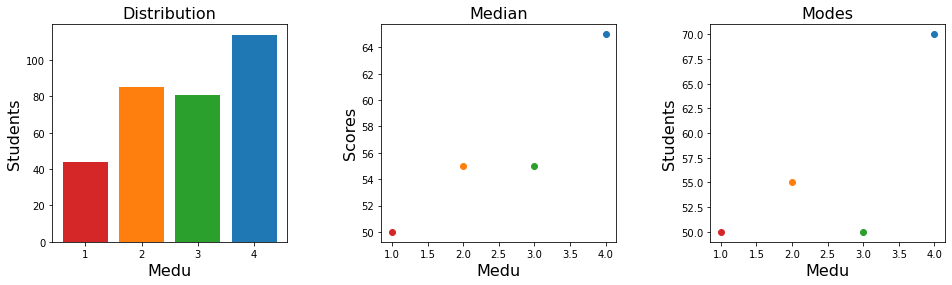

{4.0: 114, 2.0: 85, 3.0: 81, 1.0: 44}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fedu             2.0            92        28.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fedu             3.0            88        27.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fedu             4.0            81        25.0        60.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fedu             1.0            63        19.0        50.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

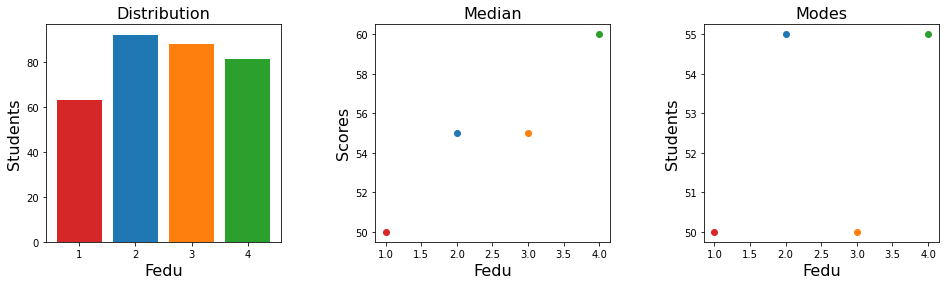

{2.0: 92, 3.0: 88, 4.0: 81, 1.0: 63}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fjob             other         165        56.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fjob             services       82        28.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fjob             teacher        23         8.0        70.0       70.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fjob             health         13         4.0        50.0       40.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 Fjob             at_home        11         4.0        55.0       60.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

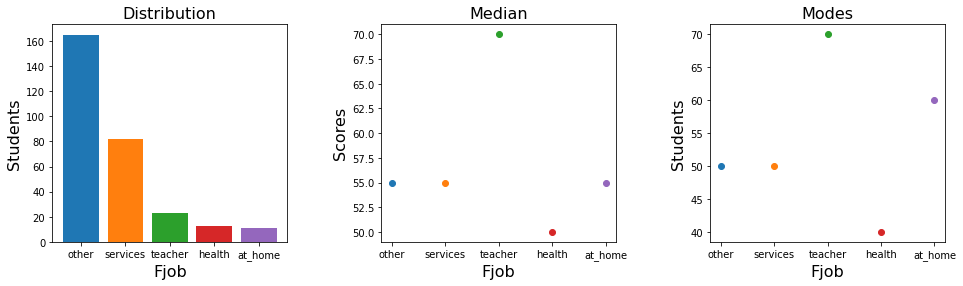

{'other': 165, 'services': 82, 'teacher': 23, 'health': 13, 'at_home': 11}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 reason           course        109        35.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 reason           reputation      90        29.0        60.0       60.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 reason           home           80        26.0        55.0       52.5 

 Feature        Value           Obs.      % Obs      Median       Mode 
 reason           other          30        10.0        52.5       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

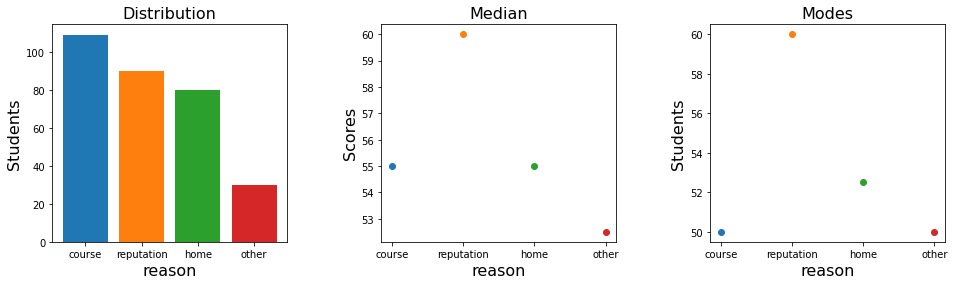

{'course': 109, 'reputation': 90, 'home': 80, 'other': 30}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 famrel           4.0           148        49.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 famrel           5.0            85        28.0        60.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 famrel           3.0            50        17.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 famrel           2.0            13         4.0        60.0       75.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 famrel           1.0             7         2.0        60.0       62.5 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

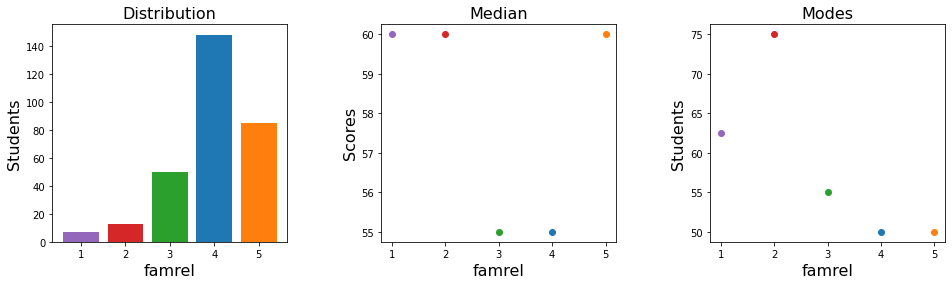

{4.0: 148, 5.0: 85, 3.0: 50, 2.0: 13, 1.0: 7}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 freetime         3.0           120        38.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 freetime         4.0            93        29.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 freetime         2.0            57        18.0        60.0       57.5 

 Feature        Value           Obs.      % Obs      Median       Mode 
 freetime         5.0            32        10.0        60.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 freetime         1.0            16         5.0        50.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

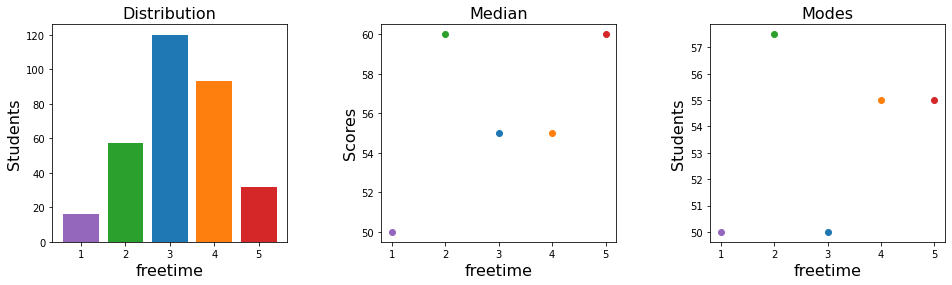

{3.0: 120, 4.0: 93, 2.0: 57, 5.0: 32, 1.0: 16}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 goout            3.0           111        35.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 goout            2.0            81        25.0        60.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 goout            4.0            69        22.0        55.0       40.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 goout            5.0            39        12.0        50.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 goout            1.0            19         6.0        55.0       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

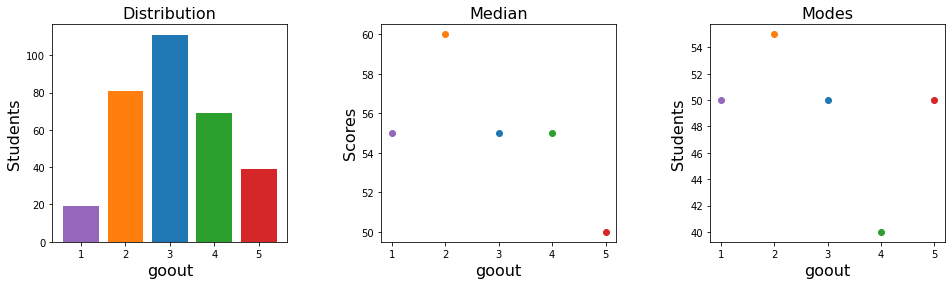

{3.0: 111, 2.0: 81, 4.0: 69, 5.0: 39, 1.0: 19}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 health           3             249        77.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 health           1              43        13.0        65.0       75.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 health           2              32        10.0        62.5       50.0 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

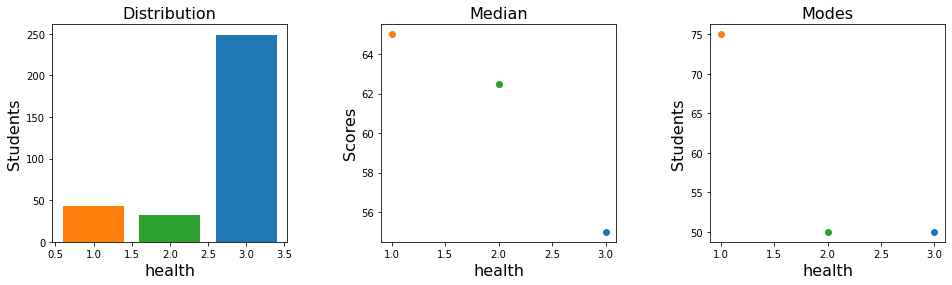

{3: 249, 1: 43, 2: 32}
__________________________________________________________________________________________

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         0.0            69        22.0        60.0       62.5 

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         2.0            55        18.0        55.0       55.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         4.0            47        15.0        55.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         6.0            28         9.0        62.5      61.67 

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         8.0            18         6.0        50.0       50.0 

 Feature        Value           Obs.      % Obs      Median       Mode 
 absences         10.0           15         5.0        55.0       50.0 

 Feature       

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

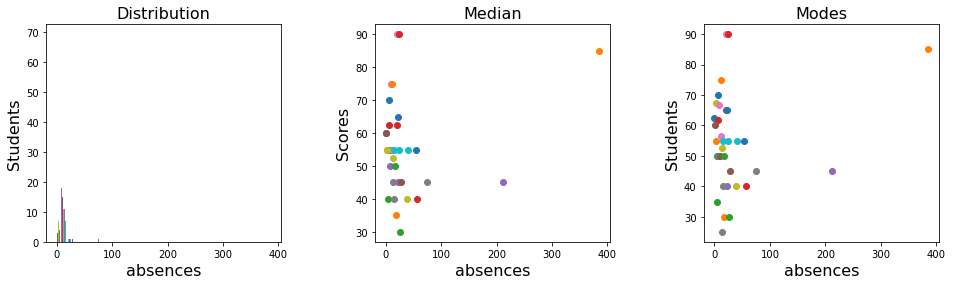

{0.0: 69, 2.0: 55, 4.0: 47, 6.0: 28, 8.0: 18, 10.0: 15, 12.0: 11, 14.0: 11, 3.0: 7, 16.0: 7, 7.0: 5, 18.0: 5, 5.0: 4, 20.0: 4, 22.0: 3, 1.0: 3, 9.0: 3, 15.0: 2, 13.0: 2, 25.0: 1, 54.0: 1, 385.0: 1, 26.0: 1, 56.0: 1, 212.0: 1, 28.0: 1, 21.0: 1, 75.0: 1, 38.0: 1, 40.0: 1, 23.0: 1, 11.0: 1, 17.0: 1, 24.0: 1}
_____________________________________________________________________



In [111]:
processor.distrandscore(dfnb)

------- school --------------------------
T= 1.9606740032286367 P= 0.05077885363243206
Feature is significant!
--------------------------------------------

------- sex --------------------------
T= -2.071181470319839 P= 0.039138077472595005
Feature is significant!
--------------------------------------------

------- address --------------------------
T= nan P= nan
Feature is significant!
--------------------------------------------

------- traveltime --------------------------
T= 1.2784352542658262 P= 0.2020167068034915
Feature is not significant!
--------------------------------------------

------- studytime --------------------------
T= -3.731465768577924 P= 0.00022496921058875202
Feature is significant!
--------------------------------------------

------- failures --------------------------
T= 0.9886375941093183 P= 0.3235827888664651
Feature is not significant!
--------------------------------------------

------- schoolsup --------------------------
T= -3.894991578209608 P= 0.

,max,min,mean,median
school,,,,
GP,100.0,20.0,58.280702,55.0
MS,80.0,25.0,52.948718,50.0


,max,min,mean,median
sex,,,,
F,90.0,20.0,55.906433,55.0
M,100.0,25.0,59.575163,60.0


,max,min,mean,median
address,,,,
R,90.0,25.0,52.898551,50.0
U,100.0,20.0,58.724280,55.0


,max,min,mean,median
studytime,,,,
0,95.0,20.0,55.761317,55.0
1,100.0,35.0,63.271605,65.0


,max,min,mean,median
schoolsup,,,,
no,100.0,20.0,59.246324,60.0
yes,85.0,25.0,49.302326,50.0


,max,min,mean,median
higher,,,,
no,65.0,35.0,49.583333,50.0
yes,100.0,20.0,57.946128,55.0


['school', 'sex', 'address', 'studytime', 'schoolsup', 'higher']


<AxesSubplot:>

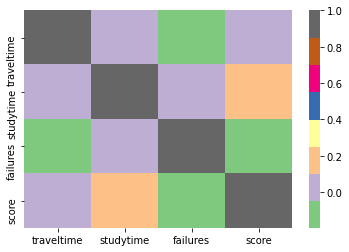

In [122]:
# Проведём первичную оценку значимости бинарных параметров с помощью критерия Стьюдента

processor.binaries_significance_checker(dfb, 0.06)
sns.heatmap(dfb.corr(), cmap='Accent')

In [123]:
# Обработка пропусков и выбор значимых параметров
# Обработка датасета и отбор бинарных признаков
# Мы получили датасет бинарных данных, проверим как у нас обстоят дела с пропусками

dfb.isnull().sum()

school         0
sex            0
address       12
traveltime     0
studytime      0
failures       0
schoolsup      9
higher        15
score          0
dtype: int64

In [124]:
# Наш датасет по прежнему содержит отсутствующие данные для признаков address, schoolsup и higher. 
# Для дальнейшей обработки и анализа нам необходимо решить, как мы с ними будем поступать 
# (удалять или заменять, и если заменять то чем?). Учитывая то что многие признаки являются категориальными, 
# и следовательно такие меры центральной тенденции как средние и медианы для них бессмысленны, 
# в качестве заменяемого значения мы будем использовать модальные значения признаков. 
# Для того чтобы понять, насколько устойчивы будут оценки значимости признаков при данном подходе, 
# мы также проведём анализ датасета из которого были удалены все отсутствующие значения.

# Для замены отсутствующих значений на модальные, мы будем использовать специально написанный метод deleter класса Myfirstclass,
# примающего в качестве аргументов имя датасета и код типа обработки 
# (0- для удаления и 1- для импьютинга отсутствующего значения модальным).

# Теперь посмотрим, изменятся ли данные при замене пропусков на модальные значения

modsubs1 = processor.deleter(dfb, 1)
modsig1 = processor.binaries_significance_checker(modsubs1, 0.05)

------- school --------------------------
T= 1.9606740032286367 P= 0.05077885363243206
Feature is not significant!
--------------------------------------------

------- sex --------------------------
T= -2.071181470319839 P= 0.039138077472595005
Feature is significant!
--------------------------------------------

------- address --------------------------
T= 2.8036958189004197 P= 0.005358571136818877
Feature is significant!
--------------------------------------------

------- traveltime --------------------------
T= 1.2784352542658262 P= 0.2020167068034915
Feature is not significant!
--------------------------------------------

------- studytime --------------------------
T= -3.731465768577924 P= 0.00022496921058875202
Feature is significant!
--------------------------------------------

------- failures --------------------------
T= 0.9886375941093183 P= 0.3235827888664651
Feature is not significant!
--------------------------------------------

------- schoolsup ------------------

,max,min,mean,median
sex,,,,
F,90.0,20.0,55.906433,55.0
M,100.0,25.0,59.575163,60.0


,max,min,mean,median
address,,,,
R,90.0,25.0,52.898551,50.0
U,100.0,20.0,58.921569,55.0


,max,min,mean,median
studytime,,,,
0,95.0,20.0,55.761317,55.0
1,100.0,35.0,63.271605,65.0


,max,min,mean,median
schoolsup,,,,
no,100.0,20.0,58.914591,55.0
yes,85.0,25.0,49.302326,50.0


['sex', 'address', 'studytime', 'schoolsup']


In [125]:
# Несмотря на то что параметр address у нас немного вышел за рамки определяющими значимость на уровне P=0.05, 
# мы всё-таки его оставтим,

# Рассмотрим сет с удалением всех строк, содержащих хотя бы один пропуск.
# Посмотрим что нам покажет анализ бинарных признаков.

modsubs0 = processor.deleter(dfb, 0)
modsig0 = processor.binaries_significance_checker(modsubs0, 0.05)


------- school --------------------------
T= 1.9685156288186898 P= 0.04996758123659013
Feature is significant!
--------------------------------------------

------- sex --------------------------
T= -2.0786007986084467 P= 0.038539227422554806
Feature is significant!
--------------------------------------------

------- address --------------------------
T= 2.9301170878992635 P= 0.0036595540399676964
Feature is significant!
--------------------------------------------

------- traveltime --------------------------
T= 1.1679981612488297 P= 0.2437735038595919
Feature is not significant!
--------------------------------------------

------- studytime --------------------------
T= -3.3653046707836274 P= 0.0008683835112299817
Feature is significant!
--------------------------------------------

------- failures --------------------------
T= 1.1872080735599977 P= 0.23612384744499568
Feature is not significant!
--------------------------------------------

------- schoolsup -------------------

,max,min,mean,median
school,,,,
GP,100.0,20.0,58.301158,55.0
MS,80.0,25.0,52.258065,50.0


,max,min,mean,median
sex,,,,
F,90.0,20.0,55.854430,55.0
M,100.0,25.0,59.810606,60.0


,max,min,mean,median
address,,,,
R,90.0,25.0,52.575758,50.0
U,100.0,20.0,59.151786,55.0


,max,min,mean,median
studytime,,,,
0,95.0,20.0,55.810185,55.0
1,100.0,35.0,63.040541,62.5


,max,min,mean,median
schoolsup,,,,
no,100.0,20.0,59.173387,57.5
yes,85.0,25.0,48.690476,50.0


['school', 'sex', 'address', 'studytime', 'schoolsup']


In [126]:
modsubs1.columns.values

array(['school', 'sex', 'address', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'higher', 'score'], dtype=object)

In [128]:
# проведём векторизацию признаков

modsubs1 = copy.deepcopy(
    modsubs1[['school', 'sex', 'address', 'studytime', 'schoolsup']])

,studytime,school_MS,sex_M,address_U,schoolsup_yes
0,0,0,0,1,1
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,0,0,0,1,0


<AxesSubplot:>

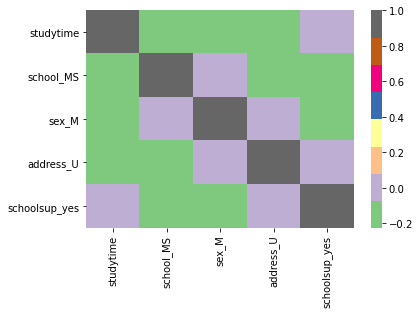

In [129]:
modsubs1 = pd.get_dummies(copy.deepcopy(modsubs1), drop_first=True)
display(modsubs1.head())
sns.heatmap(modsubs1.corr(), cmap='Accent')

,studytime,school_MS,sex_M,address_U,schoolsup_yes
0,0,0,0,1,1
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,0,0,0,1,0


<AxesSubplot:>

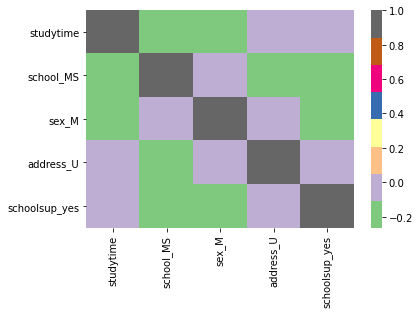

In [130]:
modsubs0 = modsubs0[['school', 'sex', 'address', 'studytime', 'schoolsup']]
modsubs0 = pd.get_dummies(copy.deepcopy(modsubs0), drop_first=True)
display(modsubs0.head())
sns.heatmap(modsubs0.corr(), cmap='Accent')

In [131]:
# Обработка датасета и отбор мультинарных признаков
# Проверяем на пропуски мультинарную часть датасета.


dfnb.isnull().sum()

age          0
Medu         0
Fedu         0
Fjob        30
reason      15
famrel      21
freetime     6
goout        5
health       0
absences    10
score        0
dtype: int64

In [132]:

# Пропусков достаточно много, и мы задействуем две следующие тактики: 
# 1) Удаление всех строк имеющих хотя бы один пропуск и проверку значимости проблемных признаков

# 2) В случае, если признаки окажутся значимыми мы вернёмся к исходному ненулевому сету
# и заменим пропуски категориальных признаков их модами, а для пропусков численных порядковых признаков, 
# последовательно изучим варианты замены средними, и медианными значениями.

# Проведём оценку значимости на радикально зачищенном сете

dfnb0 = processor.deleter(dfnb, 0)
dfbfv0 = pd.get_dummies(dfnb0, drop_first=True)
processor.multi_T_test(dfbfv0)

 Feature      Combin.   Pvalue
...............................
Medu           4 & 1    0.0031 


C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

...............................
absences       15 & 1    0.0   


C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

...............................
Fjob_teacher   0 & 1    0.0178 


C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

In [133]:
# Мы обнаруживаем значимые различия в результатах для признаков уровня материнского образования, пропусков занятий, а также наличия отца-преподавателя.

# Без учёта поправки Бонферрони у нас появляются следующие признаки: возраст, оношения в семье и уровень образования отца

# Теперь посмотрим насколько стабильны эти оценки, заменим все пропуски признаков их модами

dfnb1 = processor.deleter(dfnb, 1)
dfbfv1 = pd.get_dummies(dfnb1, drop_first=True)
processor.multi_T_test(dfbfv1)

 Feature      Combin.   Pvalue
...............................
Medu           4 & 2    0.0063 
...............................

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva


Medu           4 & 1    0.0001 
...............................
Fedu           4 & 1    0.0062 


C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

...............................
Fjob_teacher   0 & 1    0.0036 


C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

In [134]:
# У нас добавился признак образования отца и исчез признак пропусков.

# Без поправки Бонферрони признак пропусков занятий остаётся и к нему добавляются свободное время и время с друзьями

# Продолжаем работу с порядковой частью сета, и проверим результаты импьютинга медианой и средним.

# Сперва ищем медианы и средние для замены пропусков средним медианами

dfnbraw = pd.get_dummies(dfnb, drop_first=True)

In [135]:
print("imputing by means", end="\n\n")
dfnbmeanD = copy.deepcopy(dfnbraw).select_dtypes(include=['float64', 'Int64'])
for i in dfnbmeanD.columns:
    #     print(dfnbmeanD[i].value_counts(dropna=False))
    #     print(dfnbmeanD[i].median())
    dfnbmeanD[i] = dfnbmeanD[i].fillna(dfnbmeanD[i].mean())
#     print(dfnbmeanD[i].value_counts(dropna=False))
processor.multi_T_test(dfnbmeanD)

imputing by means

 Feature      Combin.   Pvalue
...............................
Medu           4 & 2    0.0063 
...............................
Medu           4 & 1    0.0001 


C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

...............................
Fedu           4 & 1    0.0062 


C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

In [137]:
print("imputing by Median", end="\n\n")
dfnbmedianD = copy.deepcopy(dfnbraw).select_dtypes(include=['float64', 'Int64'])
for i in dfnbmedianD.columns:
    dfnbmedianD[i] = dfnbmedianD[i].fillna(dfnbmedianD[i].median())
processor.multi_T_test(dfnbmedianD)

imputing by Median

 Feature      Combin.   Pvalue
...............................
Medu           4 & 2    0.0063 
...............................
Medu           4 & 1    0.0001 


C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

...............................
Fedu           4 & 1    0.0062 


C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: inva

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\777\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for

In [74]:
# Заключение
# Итак, по результатам анализа мы отобрали следующие признаки:
# school, sex, address, studytime, schoolsup, Medu, Fedu, Fjob_teacher. 
# Однако, без поправки Бонферрои к ним прибавляются возраст, свободное время, время на общение с друзьями, количество пропусков уроков и уровень удовлетворённости отношениями в семье.

# Мы видим, что основнными факторами влияющими на результативность являются: 
# 1) Среда в которой находится учащийся, определяемая местом проживания, школы, образования родителей).

# 2) Старательность студентов в учёбе.

# 3) Пол студента

# 4) Образовательная поддержа со стороны школы и преподавательская деятельность отца.

# Учитывая характер изменения признаков, идеальным инструментом для построение модели предсказывающей оценки на 
# экзамене представляется ансамблевые методы.